![Unemployment rate](Unemployment%20rate.jpg)


# Executive Summary:

This data analysis investigates the trends and patterns in unemployment rates across different demographic groups in the United States from 2010 to 2019. The dataset, sourced from the Unemployment Kaggle Dataset (2010 - 2020), provides comprehensive insights into monthly unemployment rates based on education level, race, and gender.

Key Findings:

The analysis reveals significant differences in unemployment rates based on education level. Individuals with higher degrees, such as professional or associate degrees, experience lower unemployment rates and fluctuations compared to those with primary or high school education. This underscores the importance of education in accessing economic opportunities.

There are notable disparities in unemployment rates among different racial groups. Black and Hispanic populations tend to experience higher unemployment rates compared to White and Asian populations. Further investigation is warranted to understand the underlying factors contributing to these disparities.

While there are slight differences in unemployment rates between men and women, the overall patterns indicate that women tend to have slightly lower rates. However, the analysis reveals distinct seasonality patterns in unemployment between men and women, suggesting gender-specific factors influence employment trends.

The unemployment rate for men is expected to continue decreasing, contributing to the overall decreasing trend of mean unemployment rate from 2010 to 2019.

# Introduction:
In this data analysis, I try to explore the trends and patterns in unemployment rates across various demographic groups in the United States from 2010 to 2020. The dataset provides insights into how unemployment rates vary based on factors such as education level, race, and gender.

Importing the Unemployment Kaggle Dataset (2010 - 2020), uploaded by Aniruddha Shirahatti, allows to examine the monthly unemployment rates and how they fluctuate over the years. This comprehensive dataset captures the unemployment rates based on education levels ranging from primary school to professional degrees, as well as across different racial groups including White, Black, Asian, and Hispanic populations. Additionally, it provides insights into the gender-specific unemployment rates for men and women.

# Questions:
1. What are the trends in unemployment rates in the United States from 2010 to 2019?
2. How do unemployment rates vary across different demographic groups such as education level, race, and gender?
3. Are there significant disparities in unemployment rates between the different demographical groups?
4. How does educational attainment influence unemployment rates?
5. Are there seasonal patterns in unemployment rates, and if yes, how do they differ among demographic groups?
6. How will the men's unemployment rate change in the near future? What can be expected for April 2021?

# Data:

Importing the Unemployment Kaggle Dataset (2010 - 2020).
This dataset, uploaded by ANIRUDDHA SHIRAHATTI, contains time series data on the unemployment rate in the US from January 2010 to the 2020. It includes records of the unemployment rate based on education, race, and gender of adults.

In [1]:
SELECT * FROM 'Unemploiment rate in US.csv';

,Year,Month,Primary_School,Date,High_School,Associates_Degree,Professional_Degree,White,Black,Asian,Hispanic,Men,Women
0,2010,Jan,15.3,Jan-10,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2011,Jan,14.3,Jan-11,9.5,8.1,4.3,8.1,15.8,6.8,12.3,9.0,7.9
2,2012,Jan,13.0,Jan-12,8.5,7.1,4.3,7.4,13.6,6.7,10.7,7.7,7.6
3,2013,Jan,12.0,Jan-13,8.1,6.9,3.8,7.1,13.7,6.4,9.7,7.5,7.2
4,2014,Jan,9.4,Jan-14,6.5,5.9,3.3,5.7,12.1,4.7,8.3,6.2,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2016,Dec,7.5,Dec-16,5.1,3.8,2.5,4.2,7.9,2.7,5.9,4.4,4.3
128,2017,Dec,6.2,Dec-17,4.2,3.6,2.2,3.7,6.7,2.5,5.0,3.7,3.7
129,2018,Dec,5.8,Dec-18,3.8,3.3,2.2,3.4,6.6,3.3,4.4,3.6,3.5
130,2019,Dec,5.2,Dec-19,3.7,2.7,1.9,3.2,5.9,2.5,4.2,3.1,3.2


# Importing neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
# Set Seaborn style
sns.set_style("white")

# Automating repetitive tasks by creating functions.

In [4]:
def plot_mean_unemployment_by_year_month(dataframe):
    """
    Plot the mean unemployment rate for each year-month.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the unemployment rate data indexed by year-month.

    Returns:
    None

    Example:
    plot_mean_unemployment_by_year_month(gender_subset)
    """
    # Extract the year and month from the index of the DataFrame
    index_year_month = dataframe.index.to_period('M')

    # Compute the mean unemployment rate for each year-month
    unemployment_by_year_month = dataframe.groupby(index_year_month).mean()
    
    # Set Seaborn style
    sns.set_style("white")

    # Plot the mean unemployment rate for each year-month
    ax = unemployment_by_year_month.plot(fontsize=6, linewidth=1)

    # Set axis labels and legend
    ax.set_xlabel('Year-Month', fontsize=10)
    ax.set_ylabel('Mean unemployment rate', fontsize=10)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.show()

In [5]:
def plot_mean_unemployment_by_year(dataframe):
    """
    Plot the mean unemployment rate for each month.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the unemployment rate data indexed by month.

    Returns:
    None

    Example:
    plot_mean_unemployment_by_month(gender_subset)
    """
    # Extract the year from the index of the DataFrame
    index_year = dataframe.index.year

    # Compute the mean unemployment rate for each month for each gender
    unemployment_by_year_for_gender = dataframe.groupby(index_year).mean()

    # Plot the mean unemployment rate for each month
    ax = unemployment_by_year_for_gender.plot(fontsize=6, linewidth=1)

    # Set axis labels and legend
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Mean unemployment rate', fontsize=10)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.show()

In [6]:
def plot_mean_unemployment_by_month(dataframe):
    """
    Plot the mean unemployment rate for each month.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the unemployment rate data indexed by month.

    Returns:
    None

    Example:
    plot_mean_unemployment_by_month(gender_subset)
    """
    # Extract the month from the index of the DataFrame
    index_month = dataframe.index.month

    # Compute the mean unemployment rate for each month
    unemployment_by_month = dataframe.groupby(index_month).mean()

    # Plot the mean unemployment rate for each month
    ax = unemployment_by_month.plot(fontsize=6, linewidth=1)

    # Set axis labels and legend
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Mean unemployment rate', fontsize=10)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.show()

# Exploring the dataset

In [7]:
# Display the first few rows of the DataFrame to verify the data was read correctly
print(df.head())

   Year Month  Primary_School    Date  ...  Asian  Hispanic   Men  Women
0  2010   Jan            15.3  Jan-10  ...    8.3      12.9  10.2    7.9
1  2011   Jan            14.3  Jan-11  ...    6.8      12.3   9.0    7.9
2  2012   Jan            13.0  Jan-12  ...    6.7      10.7   7.7    7.6
3  2013   Jan            12.0  Jan-13  ...    6.4       9.7   7.5    7.2
4  2014   Jan             9.4  Jan-14  ...    4.7       8.3   6.2    5.8

[5 rows x 13 columns]


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 132 non-null    int64  
 1   Month                132 non-null    object 
 2   Primary_School       123 non-null    float64
 3   Date                 132 non-null    object 
 4   High_School          123 non-null    float64
 5   Associates_Degree    123 non-null    float64
 6   Professional_Degree  123 non-null    float64
 7   White                123 non-null    float64
 8   Black                123 non-null    float64
 9   Asian                123 non-null    float64
 10  Hispanic             123 non-null    float64
 11  Men                  123 non-null    float64
 12  Women                123 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 13.5+ KB
None


In [8]:
# Convert the "Women" column to float data type
df['Women'] = df['Women'].astype(float)

In [9]:
print(df.dtypes)

Year                     int64
Month                   object
Primary_School         float64
Date                    object
High_School            float64
Associates_Degree      float64
Professional_Degree    float64
White                  float64
Black                  float64
Asian                  float64
Hispanic               float64
Men                    float64
Women                  float64
dtype: object


In [10]:
# Check the number of missing values in each column
print(df.isnull().sum())


Year                   0
Month                  0
Primary_School         9
Date                   0
High_School            9
Associates_Degree      9
Professional_Degree    9
White                  9
Black                  9
Asian                  9
Hispanic               9
Men                    9
Women                  9
dtype: int64


In [11]:
# Find rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print out the rows with missing values
print("Rows with missing values:")
print(missing_rows)

Rows with missing values:
     Year Month  Primary_School    Date  ...  Asian  Hispanic  Men  Women
43   2020   Apr             NaN  Apr-20  ...    NaN       NaN  NaN    NaN
54   2020   May             NaN  May-20  ...    NaN       NaN  NaN    NaN
65   2020   Jun             NaN  Jun-20  ...    NaN       NaN  NaN    NaN
76   2020   Jul             NaN  Jul-20  ...    NaN       NaN  NaN    NaN
87   2020   Aug             NaN  Aug-20  ...    NaN       NaN  NaN    NaN
98   2020   Sep             NaN  Sep-20  ...    NaN       NaN  NaN    NaN
109  2020   Oct             NaN  Oct-20  ...    NaN       NaN  NaN    NaN
120  2020   Nov             NaN  Nov-20  ...    NaN       NaN  NaN    NaN
131  2020   Dec             NaN  Dec-20  ...    NaN       NaN  NaN    NaN

[9 rows x 13 columns]


In [12]:
df = df.dropna()


In [13]:
# Check the number of missing values in each column
print(df.isnull().sum())

Year                   0
Month                  0
Primary_School         0
Date                   0
High_School            0
Associates_Degree      0
Professional_Degree    0
White                  0
Black                  0
Asian                  0
Hispanic               0
Men                    0
Women                  0
dtype: int64


In [14]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%d')

# Combine 'Year' and 'Date' columns
df['Full Date'] = df['Year'].astype(str) + '-' + df['Date'].dt.strftime('%m-%d')

# Print the DataFrame with combined date
print(df)

     Year Month  Primary_School       Date  ...  Hispanic   Men  Women   Full Date
0    2010   Jan            15.3 1900-01-10  ...      12.9  10.2    7.9  2010-01-10
1    2011   Jan            14.3 1900-01-11  ...      12.3   9.0    7.9  2011-01-11
2    2012   Jan            13.0 1900-01-12  ...      10.7   7.7    7.6  2012-01-12
3    2013   Jan            12.0 1900-01-13  ...       9.7   7.5    7.2  2013-01-13
4    2014   Jan             9.4 1900-01-14  ...       8.3   6.2    5.8  2014-01-14
..    ...   ...             ...        ...  ...       ...   ...    ...         ...
126  2015   Dec             6.4 1900-12-15  ...       6.2   4.6    4.5  2015-12-15
127  2016   Dec             7.5 1900-12-16  ...       5.9   4.4    4.3  2016-12-16
128  2017   Dec             6.2 1900-12-17  ...       5.0   3.7    3.7  2017-12-17
129  2018   Dec             5.8 1900-12-18  ...       4.4   3.6    3.5  2018-12-18
130  2019   Dec             5.2 1900-12-19  ...       4.2   3.1    3.2  2019-12-19

[12

In [15]:
# Convert datestamp column to a datetime object with explicit format
df['datestamp'] = pd.to_datetime(df['Full Date'])

# Extract year and month from 'Date' column
df['Year Extract'] = df['datestamp'].dt.year
df['Month Extract'] = df['datestamp'].dt.month

# Set the datestamp columns as the index of your DataFrame
df = df.set_index('datestamp')

In [18]:
print(df.index.duplicated().sum())

0


In [16]:
df = df.drop(columns=['Year', 'Month', 'Date'])

In [17]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df.describe())

       Primary_School  High_School  Associates_Degree  Professional_Degree  \
count      123.000000   123.000000         123.000000           123.000000   
mean         9.329268     6.391057           5.338211             3.127642   
std          3.343178     2.223607           1.895314             0.937585   
min          4.800000     3.400000           2.700000             1.900000   
25%          6.350000     4.450000           3.700000             2.300000   
50%          8.500000     5.500000           4.900000             2.800000   
75%         12.250000     8.300000           7.000000             4.000000   
max         15.800000    11.000000           8.900000             5.000000   

            White       Black       Asian    Hispanic         Men       Women  \
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000   
mean     5.455285   10.692683    4.679675    7.660163    5.848780    5.485366   
std      1.881454    3.615907    1.668363    2.837274 

In [18]:
# A subset of the jobs DataFrame
gender_subset = df[['Men', 'Women']]
education_subset = df[['Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree']]
race_subset = df[['White', 'Black', 'Asian', 'Hispanic']]
subset=df[['Men', 'Women', 'Primary_School', 'High_School', 'Associates_Degree', 'Professional_Degree', 'White', 'Black', 'Asian', 'Hispanic']]


Tukey's Honestly Significant Difference (HSD) test, also known as Tukey-Cramer analysis when used for non-parametric data, is a statistical method used for comparing the means of multiple groups to determine if there are statistically significant differences between any pair of groups. It is commonly used in analysis of variance (ANOVA) settings, especially when dealing with multiple pairwise comparisons.

The Tukey-Cramer analysis is a useful tool that generates a table with several columns including A, B, T, p-unc, and p-holm. The A and B columns represent the two groups being compared. The T column displays the test statistic (T-value) for each pairwise comparison. The p-unc column shows the uncorrected p-value, indicating the probability of observing the observed difference (or a more extreme difference) between the groups if the null hypothesis was accurate. Finally, the p-holm column shows the p-value corrected for multiple comparisons using the Holm method.

To determine if the differences between groups are significant, you should focus on the p-holm column and look for small p-values. A small p-value (typically less than 0.05) suggests that the observed difference between groups is statistically significant after correcting for multiple comparisons. You should also check for confidence intervals, which some implementations of Tukey's test provide. If the confidence interval does not contain zero, it suggests that the difference between groups is statistically significant. Additionally, while p-values indicate whether a difference is statistically significant, effect sizes (such as Cohen's d) provide information about the magnitude of the difference. Even if a difference is statistically significant, it may not be practically significant if the effect size is small.

In [19]:
from scipy.stats import ttest_ind

# Perform simple T-test
group1 = gender_subset['Men']
group2 = gender_subset['Women']

t_statistic, p_value = ttest_ind(group1, group2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.4493027057332206
P-value: 0.1485370721303754


In [20]:
# Reshape the DataFrame for Tukey-Cramer analysis
long_df_edu = education_subset.melt(var_name='Group', value_name='Unemployment Rate')

# Perform Tukey-Cramer analysis
tukey_cramer_result_edu = pg.pairwise_ttests(data=long_df_edu, dv='Unemployment Rate', between='Group', padjust='holm')

print(tukey_cramer_result_edu)

  Contrast                  A                    B  Paired  Parametric  \
0    Group  Associates_Degree          High_School   False        True   
1    Group  Associates_Degree       Primary_School   False        True   
2    Group  Associates_Degree  Professional_Degree   False        True   
3    Group        High_School       Primary_School   False        True   
4    Group        High_School  Professional_Degree   False        True   
5    Group     Primary_School  Professional_Degree   False        True   

           T    dof alternative         p-unc        p-corr p-adjust  \
0  -3.996443  244.0   two-sided  8.520809e-05  8.520809e-05     holm   
1 -11.517655  244.0   two-sided  8.461500e-25  2.538450e-24     holm   
2  11.594195  244.0   two-sided  4.757418e-25  1.902967e-24     holm   
3  -8.115887  244.0   two-sided  2.375763e-14  4.751526e-14     holm   
4  14.997989  244.0   two-sided  1.781228e-36  8.906140e-36     holm   
5  19.808801  244.0   two-sided  1.045057e-52  6.

In [21]:
# Reshape the DataFrame for Tukey-Cramer analysis
long_df_race = race_subset.melt(var_name='Group', value_name='Unemployment Rate')

# Perform Tukey-Cramer analysis
tukey_cramer_result_race = pg.pairwise_ttests(data=long_df_race, dv='Unemployment Rate', between='Group', padjust='holm')

print(tukey_cramer_result_race)

  Contrast         A         B  Paired  Parametric          T    dof  \
0    Group     Asian     Black   False        True -16.746234  244.0   
1    Group     Asian  Hispanic   False        True -10.042790  244.0   
2    Group     Asian     White   False        True  -3.420769  244.0   
3    Group     Black  Hispanic   False        True   7.317436  244.0   
4    Group     Black     White   False        True  14.250252  244.0   
5    Group  Hispanic     White   False        True   7.182830  244.0   

  alternative         p-unc        p-corr p-adjust       BF10    hedges  
0   two-sided  2.000992e-42  1.200595e-41     holm  7.326e+38 -2.128831  
1   two-sided  4.366099e-20  1.746440e-19     holm  8.705e+16 -1.276669  
2   two-sided  7.319064e-04  7.319064e-04     holm     32.375 -0.434858  
3   two-sided  3.636394e-12  1.090918e-11     holm  1.919e+09  0.930214  
4   two-sided  6.206558e-34  3.103279e-33     holm  3.151e+30  1.811535  
5   two-sided  8.236294e-12  1.647259e-11     holm 

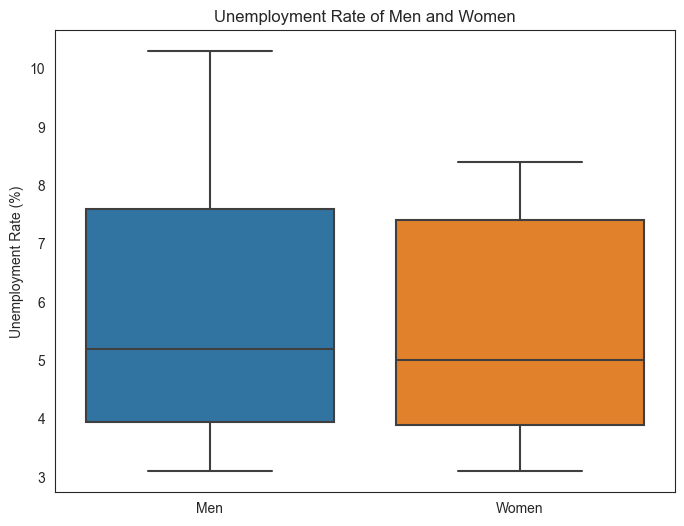

In [22]:
# Create boxplots for 'Men' and 'Women' columns
plt.figure(figsize=(8, 6))
sns.boxplot(data=gender_subset)
plt.title('Unemployment Rate of Men and Women')
plt.ylabel('Unemployment Rate (%)')
plt.show()

On average, women tend to have slightly lower unemployment rates compared to men, but there is no significant difference between the unemploiment rate of the men and women.

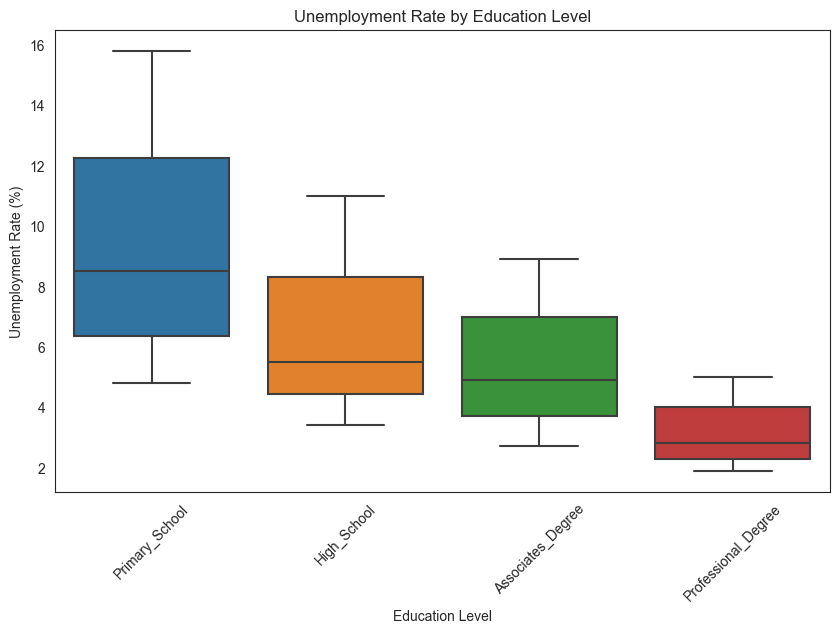

In [23]:
# Create boxplots for education levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=education_subset)
plt.title('Unemployment Rate by Education Level')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

There are significant differences between educational levels regarding the unemployment rate.Those with only a primary or high school education tend to experience higher unemployment rates compared to those with higher education qualifications, such as associates or professional degrees.The data underscores the importance of education in accessing economic opportunities and mitigating the risk of unemployment. Higher levels of education not only equip individuals with specialized skills and knowledge but also make them more competitive in the labor market, increasing their chances of finding employment.

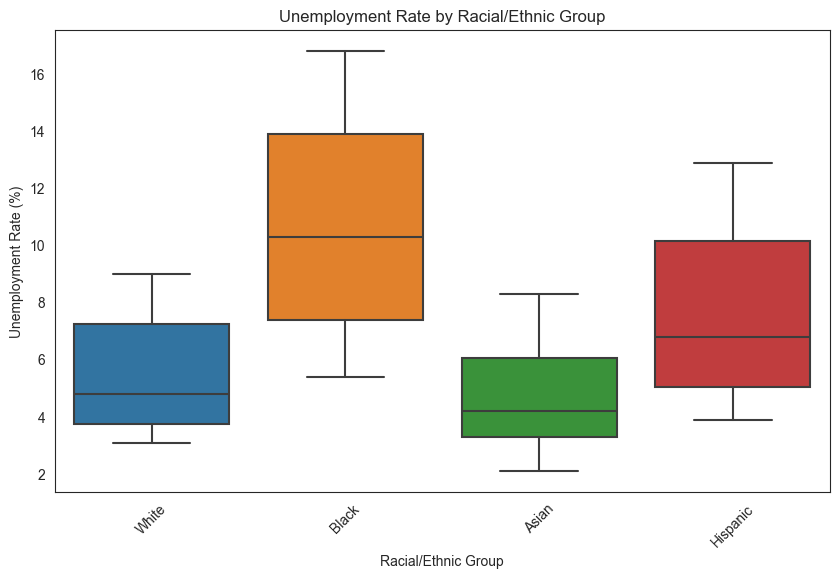

In [27]:
# Create boxplots for racial/ethnic groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=race_subset)
plt.title('Unemployment Rate by Racial/Ethnic Group')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Racial/Ethnic Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The data highlights significant differences in unemployment rates among various racial groups, with Black and Hispanic individuals generally experiencing higher rates compared to White and Asian individuals. The Asian workforce seems to be the most favored in the labor market.
What could be the root cause of this, which requires further investigation. Are there ongoing racial disparities? Or can they be related to the difference in the educational level of different races?

In [25]:
# Resample the daily data to monthly frequency and calculate the mean for each month
monthly_data_gender = gender_subset.resample('M').mean()
monthly_data = subset.resample('M').mean()

Choosing a lag of 12 for monthly data typically corresponds to capturing autocorrelation at a yearly interval. In monthly data, a lag of 12 corresponds to comparing each observation with the observation from the same month in the previous year.

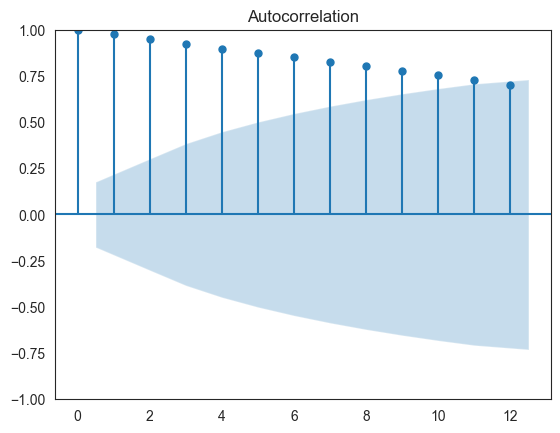

In [26]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(monthly_data['Men'], lags=12)

# Show plot
plt.show()

X-axis (Lags): The x-axis represents the number of lags, which in this case, ranges from 1 to 12. Each lag corresponds to a specific time interval between observations. For monthly data, a lag of 1 represents the autocorrelation between adjacent months, a lag of 2 represents the autocorrelation between observations two months apart, and so on up to a lag of 12, which represents the autocorrelation between observations one year apart.

Y-axis (Autocorrelation Values): The y-axis represents the autocorrelation values, which range from 1 to -1. The autocorrelation value at lag 0 is always 1, as it represents the correlation between a variable and itself (i.e., perfect correlation). As you move along the y-axis, the autocorrelation values decrease. A value of 1 indicates perfect positive autocorrelation, 0 indicates no autocorrelation (randomness), and -1 indicates perfect negative autocorrelation.

To evaluate the result of the autocorrelation plot:

Look for significant peaks or patterns in the ACF values. Peaks that extend beyond the confidence interval bands (usually shaded in the plot) may indicate significant autocorrelation at those lags.
Positive autocorrelation values indicate that observations at a particular lag are positively correlated with each other, while negative values indicate negative correlation.
ACF values close to 0 indicate little to no autocorrelation, suggesting that observations at different lags are not correlated with each other.
In summary, the autocorrelation plot provides insights into the temporal dependencies and patterns present in your time series data. It helps identify any systematic trends or seasonality that may exist in the data and informs decisions about model selection and forecasting.

There is a significant positive autocorrelation in a time series, indicates taht the data is not random, there are trends or patterns that can be leveraged for forecasting and modeling purposes.

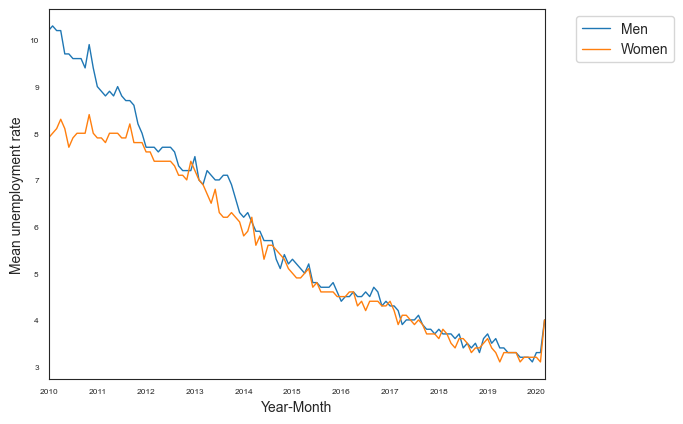

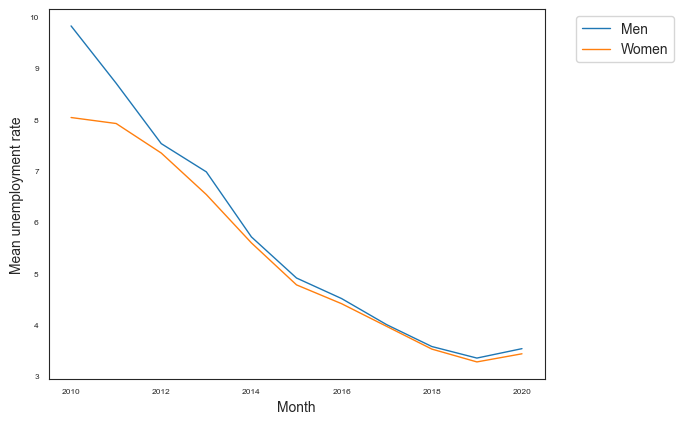

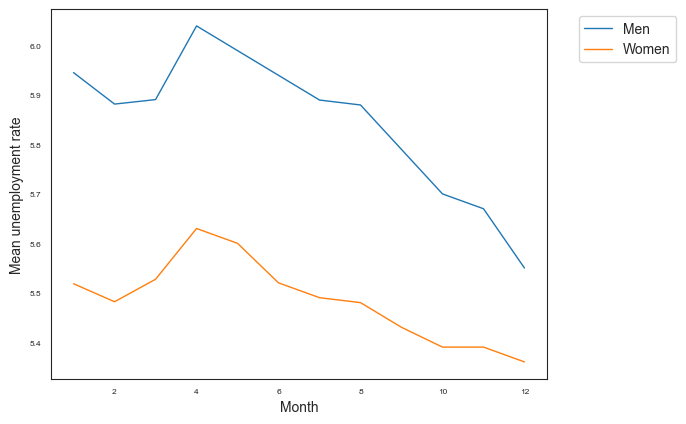

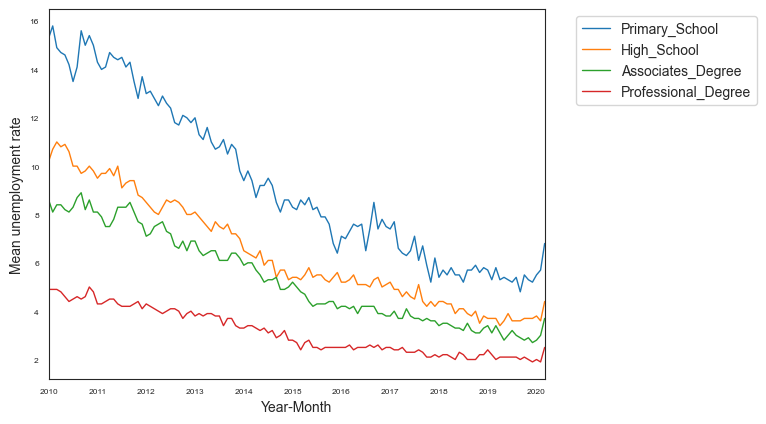

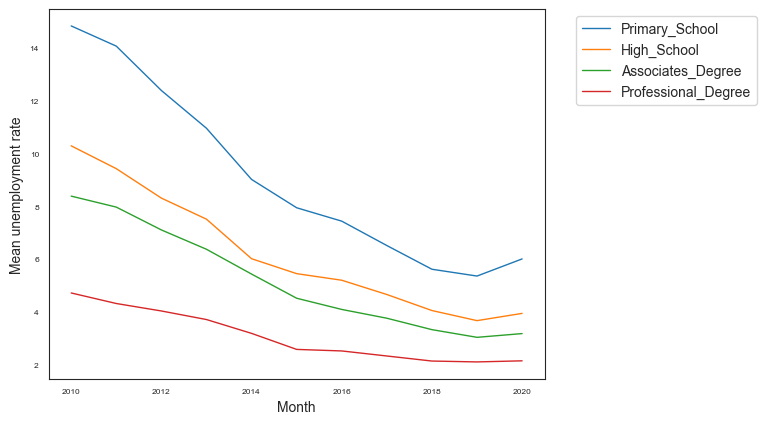

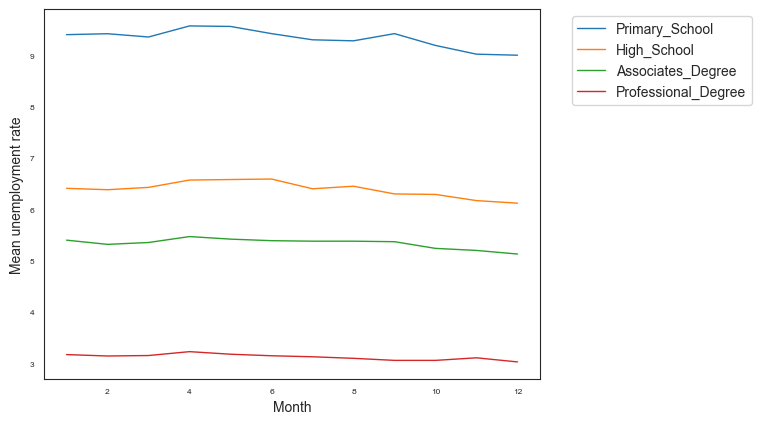

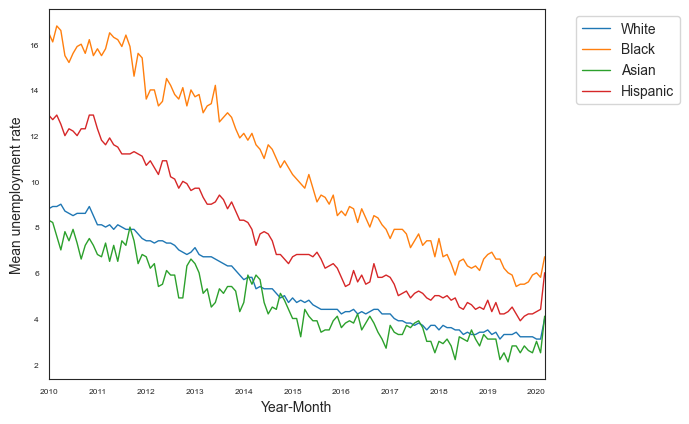

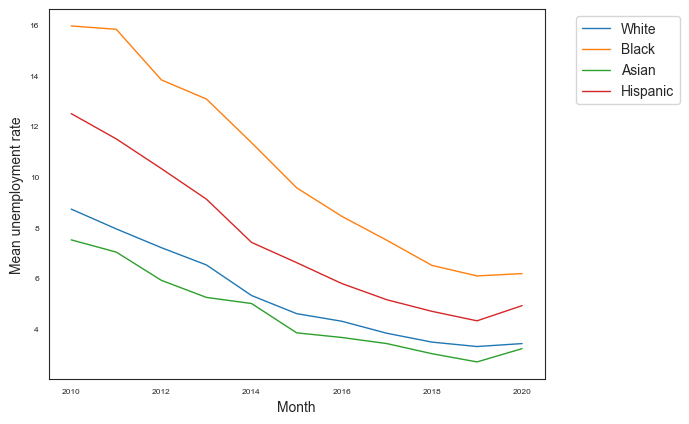

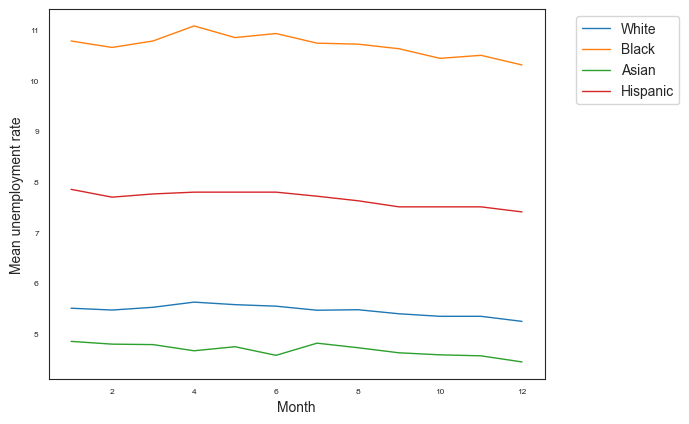

In [27]:
# List of DataFrames
dataframes = [gender_subset, education_subset, race_subset]

# List of functions
functions = [plot_mean_unemployment_by_year_month, plot_mean_unemployment_by_year, plot_mean_unemployment_by_month]

# Iterate over each DataFrame and function
for dataframe in dataframes:
    for function in functions:
        function(dataframe)

The mean unemployment rate has been on a decreasing trend from 2010 to 2019.
The unemployment rate is the highest in April while the lowest in December. There is a similar trend regarding the black race.
Presumably, the most extensive layoffs will take place in April, which affects blacks the most because blacks have an unemployment rate peak on April while other races line is smoot.
The unemployment rate is less affected by monthly patterns as education level increases.

In [31]:
# Initialize dictionary
decomp = {}
seasonal = {}  # Initialize seasonal dictionary
subset_seasonal = {}  # Initialize subset_seasonal dictionary
subset_resid = {}

# Get the names of each time series in the DataFrame
subset_names = monthly_data.columns

# Run time series decomposition on each time series of the DataFrame
for ts in subset_names:
    ts_decomposition = sm.tsa.seasonal_decompose(monthly_data[ts], period=12)  # Specify a period
    decomp[ts] = ts_decomposition
    
# Extract the seasonal values for the decomposition of each time series
for ts in subset_names:
    subset_seasonal[ts] = decomp[ts].seasonal
    
# Create a DataFrame from the subset_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(subset_seasonal)

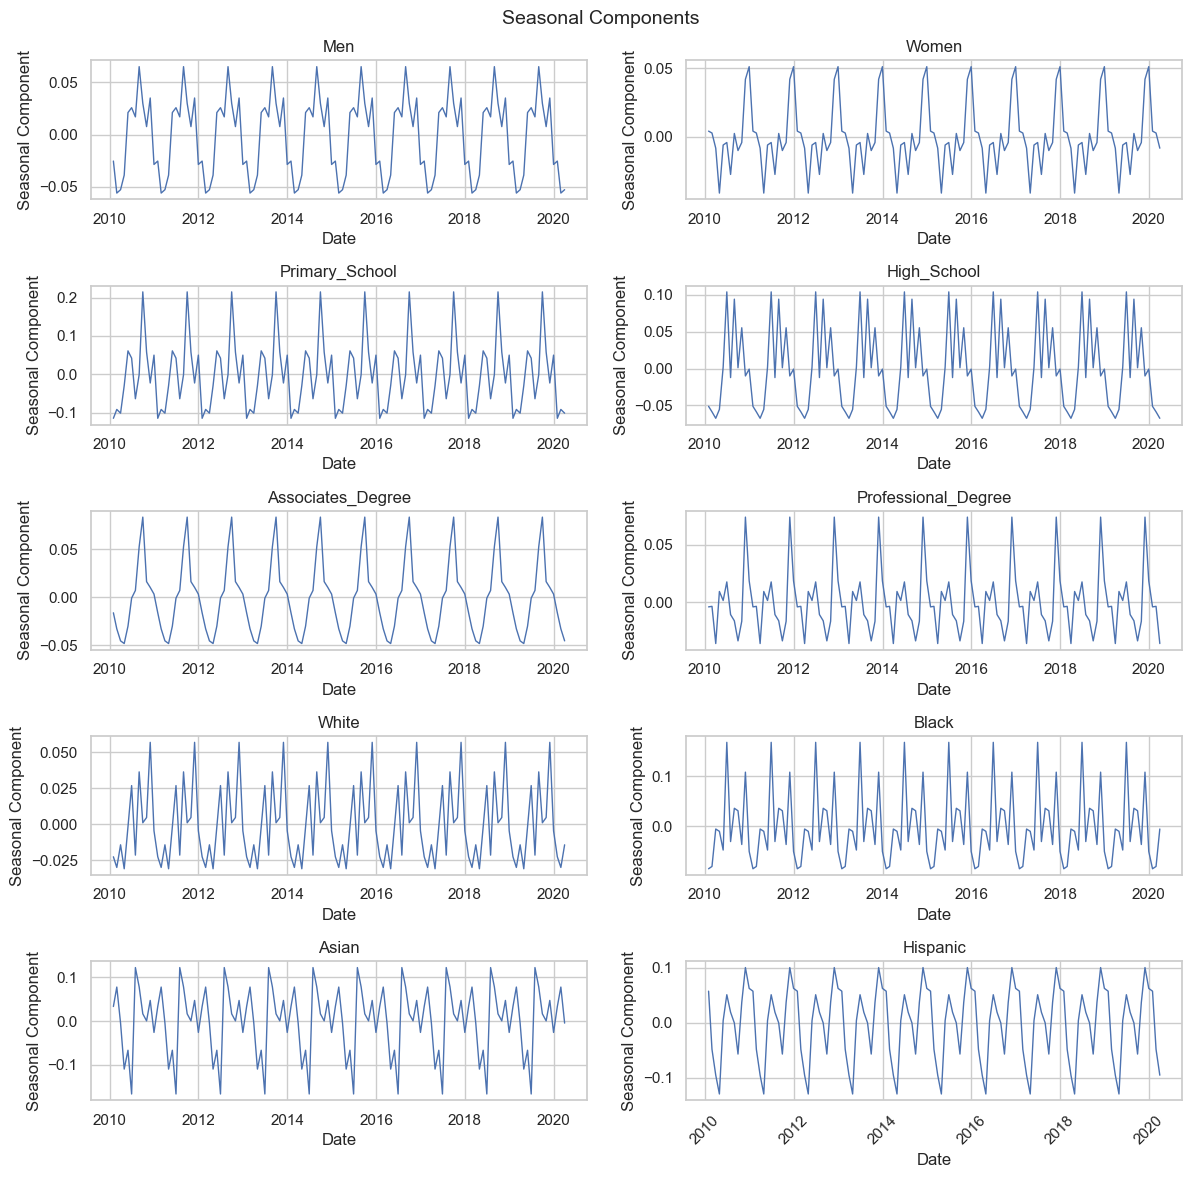

In [32]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot each time series in a separate subplot using Matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
for i, col in enumerate(seasonality_df.columns):
    axes[i // 2, i % 2].plot(seasonality_df[col], linewidth=1)
    axes[i // 2, i % 2].set_xlabel('Date')
    axes[i // 2, i % 2].set_ylabel('Seasonal Component')
    axes[i // 2, i % 2].set_title(col)

# Add main title to the entire plot
plt.suptitle('Seasonal Components', fontsize=14)

# Adjust x-axis label rotation
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

There are differences in the seasonality patterns between men and women. 
For example, while the unemployment rate for men might decrease in certain months, it could increase for women, and vice versa. This indicates potential gender-specific factors influencing employment trends.

The seasonality patterns vary among different education levels. For instance, individuals with higher education levels like professional degrees or associate degrees may experience different fluctuations compared to those with primary or high school education. This could reflect the influence of educational qualifications on job opportunities and industry demand.
Individuals with professional and associated degrees generally experience lower unemployment rates.

There are disparities in unemployment rates between racial groups.

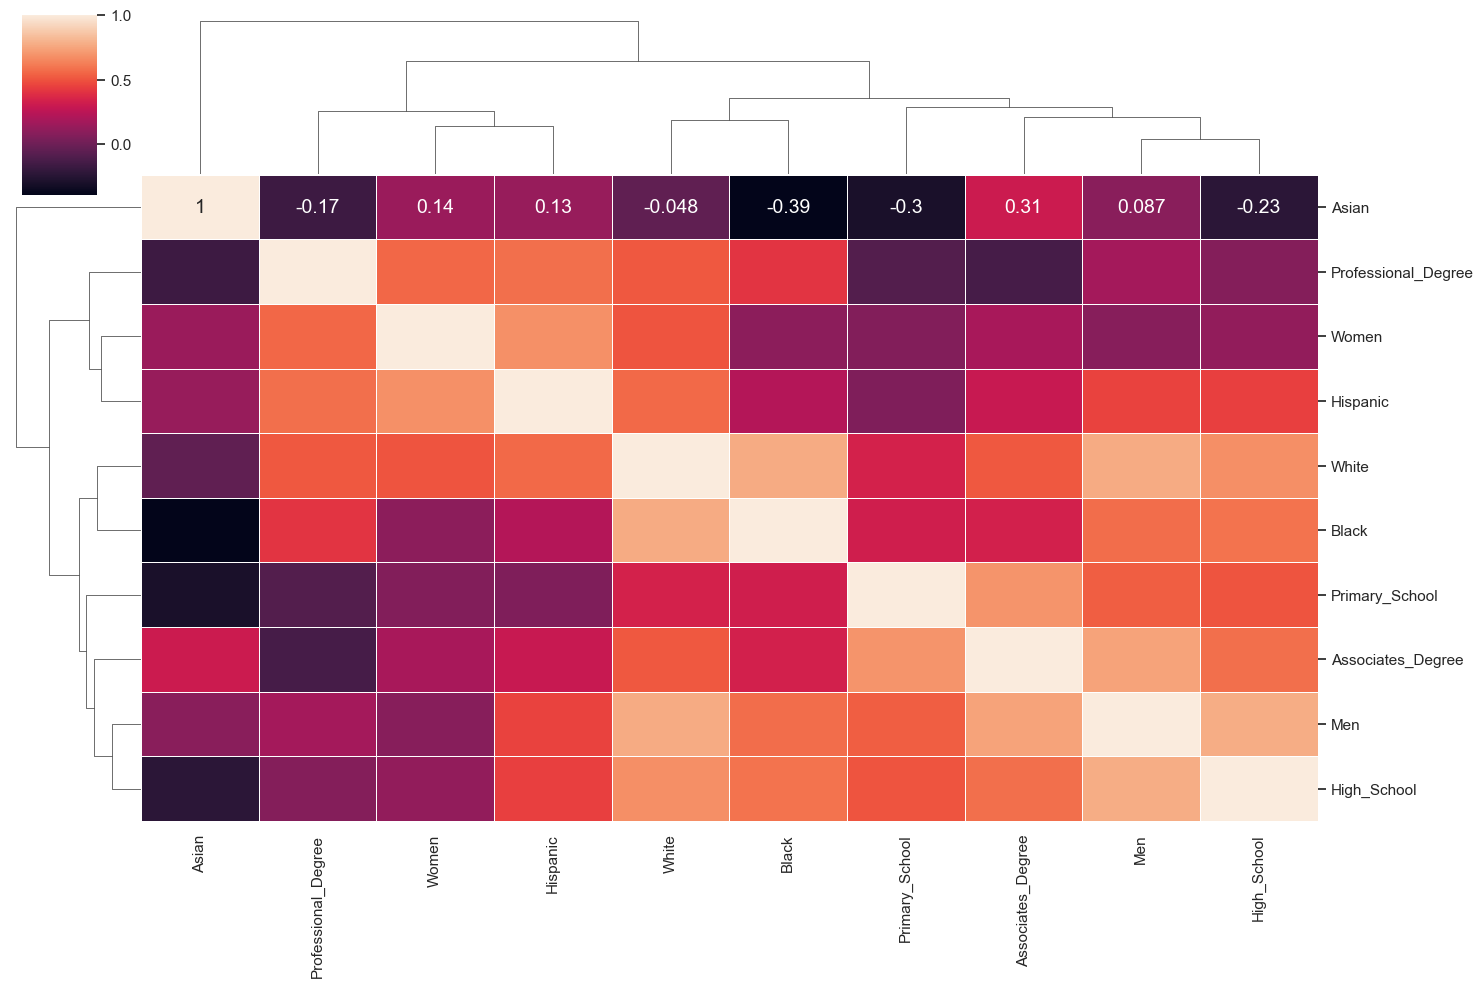

In [33]:
# Calculate the correlation matrix between the seasonal components
seasonality_corr = seasonality_df.corr()

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 14}, linewidths=.4, figsize=(15, 10), dendrogram_ratio=(.1, .2))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.savefig("clustermap.png", dpi=300)  # Save the plot with higher resolution
plt.show()

The men's unemployment seasonality correlates highly with the white race, high school, and associated degree. The women unemployed seasonality correlated the best with the hispanic race and professional degree.

The correlation analysis reveals notable differences in the seasonality of unemployment between men and women. Men's unemployment seasonality shows strong correlations with variables such as race (specifically white), educational attainment (high school and associate's degree), suggesting that factors related to race and education may play a significant role in men's employment patterns throughout the year.The high correlation between men's unemployment seasonality and educational attainment (high school and associate's degree) suggests that men with different levels of education may experience varying degrees of seasonality in unemployment. This highlights the importance of education in mitigating seasonal fluctuations in employment for men.

Race: In contrast, women's unemployment seasonality is more strongly correlated with the Hispanic race and professional degree. This indicates that Hispanic women may face unique seasonal challenges in the job market.
The correlation between women's unemployment seasonality and professional degree suggests that women with higher levels of education, particularly those with professional degrees, may experience distinct seasonal employment patterns. This could reflect differences in job opportunities, career trajectories, or industry sectors that employ professionals.

This suggests, that men with higher education levels, particularly professional degrees, may be more likely to be employed in jobs that require advanced qualifications while women may be more prevalent in industries or occupations that require lower levels of formal education. 

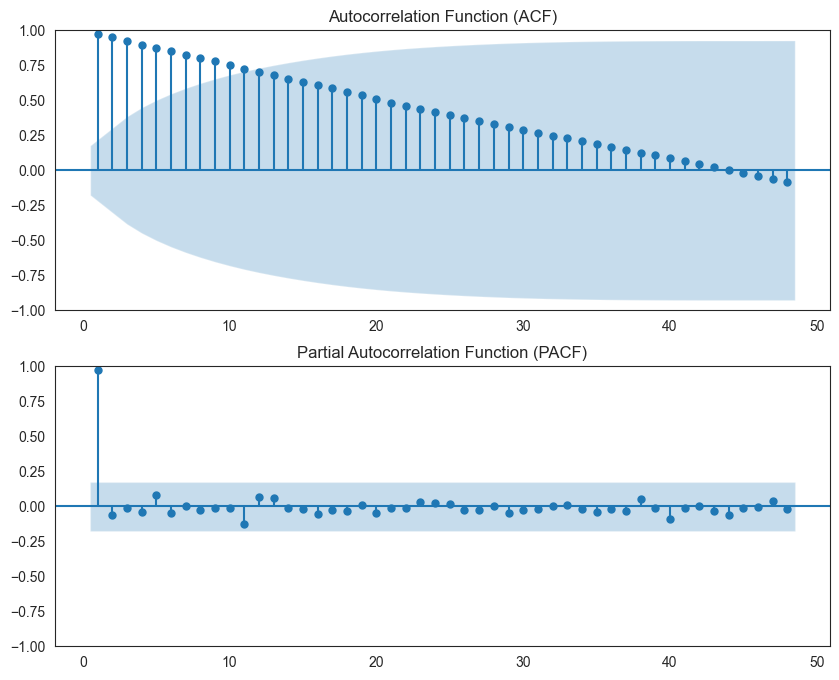

In [28]:
# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

tsaplots.plot_acf(monthly_data['Men'], zero=False, lags=48, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

tsaplots.plot_pacf(monthly_data['Men'], zero=False, lags=48, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# Show plot
plt.show()

The ACF values are elevated and exhibit a very gradual decline, it indicates non-stationarity in the data, while the time series must be made stationary before making these plots, necessitating differencing.

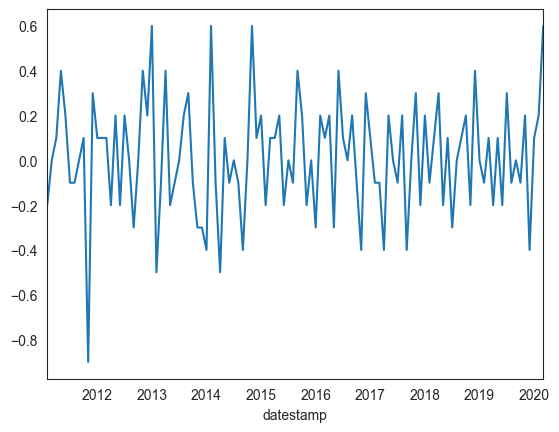

In [29]:
df_men1=monthly_data['Men'].diff().diff(periods=12).dropna()
df_men1.plot()
plt.show()


In [37]:
 # Subtract long rolling average over N steps 
df_men = monthly_data['Men'] - monthly_data['Men'].rolling(12).mean()  
# Drop NaN values 
df_men = df_men.dropna() 
df_men2=df_men.diff().dropna()

df_men2.plot()
plt.show()

In [38]:
# Check stationarity of the differenced series
# For example, using the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_men1)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# If p-value < 0.05, reject the null hypothesis of non-stationarity

ADF Statistic: -4.1355252461589815
p-value: 0.0008455446977159169
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


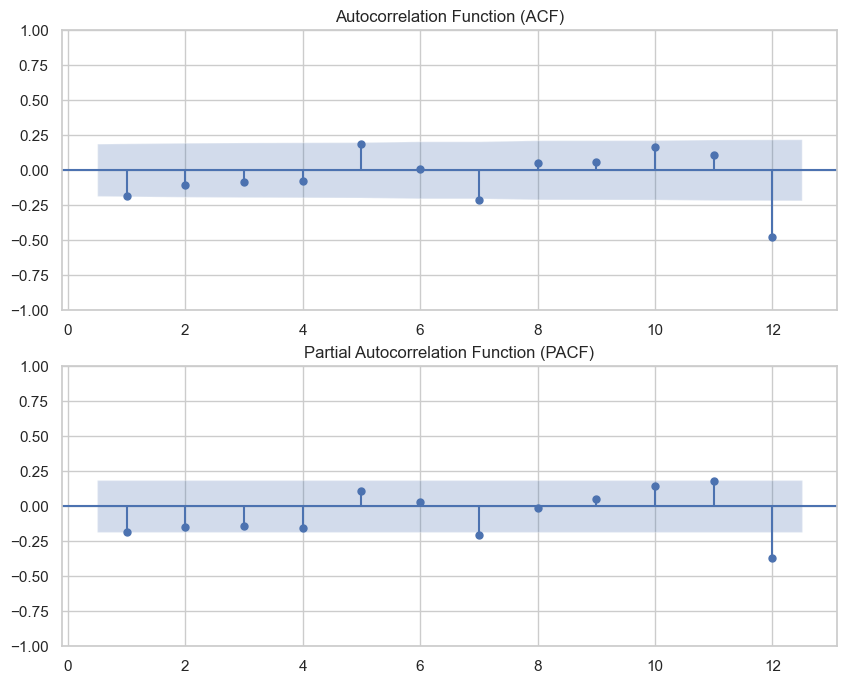

In [39]:
# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

tsaplots.plot_acf(df_men1, lags=12, zero=False, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

tsaplots.plot_pacf(df_men1, lags=12, zero=False, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# Show plot
plt.show()

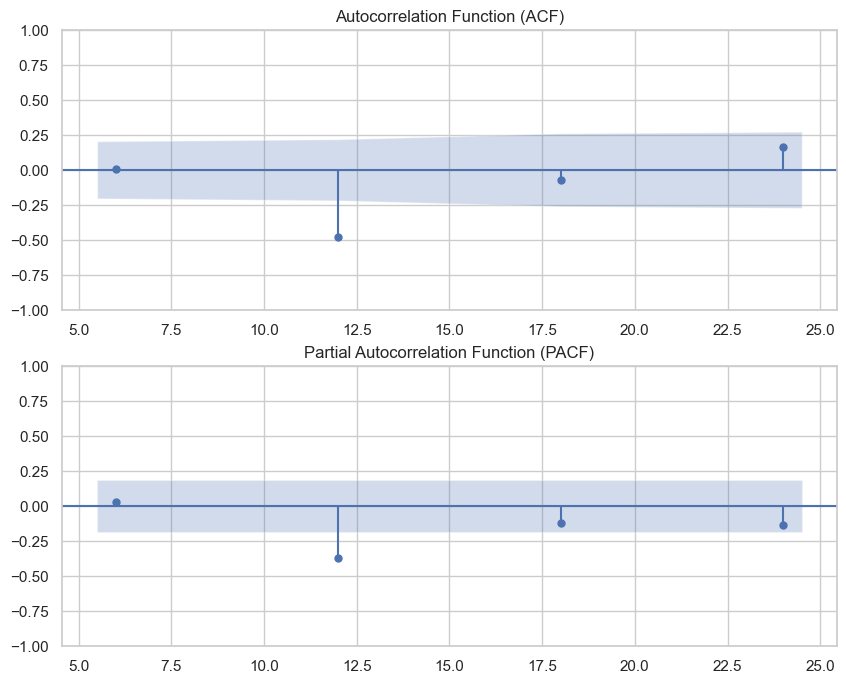

In [40]:
# Make list of lags
lags = [6, 12, 18, 24]

# Display the autocorrelation plot of your time series
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

tsaplots.plot_acf(df_men1, lags=lags, zero=False, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

tsaplots.plot_pacf(df_men1, lags=lags, zero=False, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# Show plot
plt.show()

**Goodness-of-Fit Measures**:
Evaluate the goodness-of-fit measures such as the Log Likelihood, AIC, BIC, and HQIC. Lower values of AIC, BIC, and HQIC indicate better model fit. Compare these values with those of alternative models to select the best-fitting model.

In [41]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create empty list to store search results
order_aic_bic=[]

# Define range for p, d, q, P, D, and Q
p_values = range(3)
d = 1  # Assuming non-seasonal differencing is 1
q_values = range(3)
P_values = range(3)
D = 1  # Assuming seasonal differencing is 1
Q_values = range(3)

# Loop over combinations of p, q, P, and Q values
for p, q, P, Q in itertools.product(p_values, q_values, P_values, Q_values):
    try:
        # Create and fit SARIMAX model
        model = SARIMAX(df_men1, order=(p, d, q), seasonal_order=(P, D, Q, 12))  # Assuming a seasonal period of 12
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p, d, q, P, D, Q, results.aic, results.bic))
    except Exception as e:
        print(f"Error occurred for parameters (p={p}, q={q}, P={P}, Q={Q}): {str(e)}")
        continue  # Continue to the next iteration if model fitting fails

# Sort the results by AIC
order_aic_bic.sort(key=lambda x: (x[6], x[7]))

# Print the results
for result in order_aic_bic:
    print(f"Order: {result[:3]}, Seasonal Order: {result[3:6]}, AIC: {result[6]}, BIC: {result[7]}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20922D-01    |proj g|=  1.83773D-01

At iterate    5    f=  9.17284D-01    |proj g|=  6.68434D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      7      1     0     0   6.684D-06   9.173D-01
  F =  0.91728436100398847     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.14284D-01    |proj g|=  6.12444D-02

At iterate   10    f=  5.88939D-01    |proj g|=  1.53588D-02

At iterate   15    f=  5.87323D-01    |proj g|=  7.61983D-03

At iterate   20    f=  5.87196D-01    |proj g|=  1.23246D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     33      1     0     0   1.232D-03   5.872D-01
  F =  0.58719639085451703     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.82228D-01    |proj g|=  1.09175D-01

At iterate   10    f=  4.73828D-01    |proj g|=  1.78856D-03

At iterate   15    f=  4.73394D-01    |proj g|=  1.69273D-03

At iterate   20    f=  4.73291D-01    |proj g|=  9.55192D-04

At iterate   25    f=  4.73286D-01    |proj g|=  1.11600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     42      1     0     0   1.354D-04   4.733D-01
  F =  0.47328076625257870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12437D-01    |proj g|=  5.06866D-02

At iterate    5    f=  6.12066D-01    |proj g|=  1.58451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     11      1     0     0   8.248D-06   6.121D-01
  F =  0.61206567680605983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate    5    f=  4.89871D-01    |proj g|=  2.37667D-01

At iterate   10    f=  4.75248D-01    |proj g|=  3.66300D-02

At iterate   15    f=  4.72974D-01    |proj g|=  3.98833D-03

At iterate   20    f=  4.72792D-01    |proj g|=  1.51696D-02

At iterate   25    f=  4.72777D-01    |proj g|=  2.22671D-03

At iterate   30    f=  4.72774D-01    |proj g|=  6.25019D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     47      1     0     0   6.250D-04   4.728D-01
  F =  0.47277376536093013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.76406D-01    |proj g|=  2.79804D-01

At iterate   10    f=  4.82492D-01    |proj g|=  1.39849D-01

At iterate   15    f=  4.69194D-01    |proj g|=  1.44983D-02

At iterate   20    f=  4.69010D-01    |proj g|=  1.90544D-02

At iterate   25    f=  4.68365D-01    |proj g|=  1.39106D-02

At iterate   30    f=  4.68274D-01    |proj g|=  6.23113D-03

At iterate   35    f=  4.68263D-01    |proj g|=  6.37851D-03

At iterate   40    f=  4.68260D-01    |proj g|=  2.78522D-03

At iterate   45    f=  4.68258D-01    |proj g|=  1.79088D-03
  ys=-1.248E-05  -gs= 5.959E-06 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     99      1     1     0   1.326D-03   4.683D-01
  F =  0.46825012292164542     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45613D-01    |proj g|=  4.17846D-01


 This problem is unconstrained.



At iterate    5    f=  5.37485D-01    |proj g|=  6.36325D-04

At iterate   10    f=  5.37484D-01    |proj g|=  7.52641D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   2.298D-05   5.375D-01
  F =  0.53748432382494815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53349D-01    |proj g|=  5.54086D-01


 This problem is unconstrained.



At iterate    5    f=  5.29734D-01    |proj g|=  5.84047D-02

At iterate   10    f=  4.74494D-01    |proj g|=  2.90606D-02

At iterate   15    f=  4.71163D-01    |proj g|=  2.32278D-02

At iterate   20    f=  4.69702D-01    |proj g|=  9.97681D-03

At iterate   25    f=  4.69522D-01    |proj g|=  1.59692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     42      1     0     0   1.603D-03   4.695D-01
  F =  0.46952184557696869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  5.09720D-01    |proj g|=  3.35738D-01

At iterate   10    f=  4.54787D-01    |proj g|=  6.64607D-03

At iterate   15    f=  4.51563D-01    |proj g|=  4.48982D-03

At iterate   20    f=  4.50160D-01    |proj g|=  1.95770D-02

At iterate   25    f=  4.49958D-01    |proj g|=  1.00004D-02

At iterate   30    f=  4.49951D-01    |proj g|=  9.29158D-04

At iterate   35    f=  4.49943D-01    |proj g|=  3.15770D-03

At iterate   40    f=  4.49933D-01    |proj g|=  3.96984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     68      1     0     0   1.648D-04   4.499D-01
  F =  0.449933192974

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.99566D-01    |proj g|=  1.06500D-01

At iterate   10    f=  2.58537D-01    |proj g|=  5.15615D-02

At iterate   15    f=  2.47741D-01    |proj g|=  1.10301D-02

At iterate   20    f=  2.47065D-01    |proj g|=  1.45700D-02

At iterate   25    f=  2.47055D-01    |proj g|=  1.18926D-02

At iterate   30    f=  2.47048D-01    |proj g|=  1.56509D-03

At iterate   35    f=  2.47028D-01    |proj g|=  1.14478D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     64      1     0     0   7.818D-03   2.470D-01
  F =  0.24702082466038475     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.84983D-01    |proj g|=  2.54235D-01

At iterate   10    f=  1.55182D-01    |proj g|=  1.93225D-02

At iterate   15    f=  1.42684D-01    |proj g|=  1.04312D-01

At iterate   20    f=  1.41848D-01    |proj g|=  9.11594D-03

At iterate   25    f=  1.41813D-01    |proj g|=  1.08774D-03

At iterate   30    f=  1.41133D-01    |proj g|=  2.80756D-01

At iterate   35    f=  1.39164D-01    |proj g|=  2.26663D-03

At iterate   40    f=  1.39154D-01    |proj g|=  5.44682D-03

At iterate   45    f=  1.39152D-01    |proj g|=  6.11514D-04

At iterate   50    f=  1.39140D-01    |proj g|=  2.74127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66032D-01    |proj g|=  1.04089D+00


 This problem is unconstrained.



At iterate    5    f=  2.88523D-01    |proj g|=  3.44160D-01

At iterate   10    f=  2.66839D-01    |proj g|=  2.79159D-02

At iterate   15    f=  2.60268D-01    |proj g|=  8.74105D-02

At iterate   20    f=  2.59701D-01    |proj g|=  2.00782D-03

At iterate   25    f=  2.59682D-01    |proj g|=  1.01208D-02

At iterate   30    f=  2.59674D-01    |proj g|=  4.54617D-04

At iterate   35    f=  2.59674D-01    |proj g|=  8.79756D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     37     80      2     0     0   6.115D-05   2.597D-01
  F =  0.25967359565255554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59482D-01    |proj g|=  1.18989D+00


 This problem is unconstrained.



At iterate    5    f=  1.91141D-01    |proj g|=  5.94654D-01

At iterate   10    f=  1.42244D-01    |proj g|=  5.53834D-03

At iterate   15    f=  1.37785D-01    |proj g|=  5.66293D-03

At iterate   20    f=  1.37382D-01    |proj g|=  1.99488D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  1.37342D-01    |proj g|=  5.02043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     62      2     0     0   1.270D-05   1.373D-01
  F =  0.13734168281130490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99506D-01    |proj g|=  1.05938D+00

At iterate    5    f=  2.34868D-01    |proj g|=  7.46159D-02

At iterate   10    f=  1.75066D-01    |proj g|=  2.07945D-01

At iterate   15    f=  1.39660D-01    |proj g|=  1.28791D-01

At iterate   20    f=  1.35229D-01    |proj g|=  1.39800D-03

At iterate   25    f=  1.34911D-01    |proj g|=  1.44540D-02

At iterate   30    f=  1.34148D-01    |proj g|=  5.24951D-03

At iterate   35    f=  1.34068D-01    |proj g|=  6.91879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56974D-01    |proj g|=  1.14982D+00

At iterate    5    f=  2.31228D-01    |proj g|=  2.82735D-01

At iterate   10    f=  2.11994D-01    |proj g|=  2.68200D-01

At iterate   15    f=  1.96808D-01    |proj g|=  1.58416D-01

At iterate   20    f=  1.95535D-01    |proj g|=  1.04752D-02

At iterate   25    f=  1.95229D-01    |proj g|=  6.29747D-03

At iterate   30    f=  1.95198D-01    |proj g|=  1.01372D-03

At iterate   35    f=  1.95196D-01    |proj g|=  3.40810D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.95196D-01    |proj g|=  2.16119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     83      2     0     0   1.497D-05   1.952D-01
  F =  0.19519586094558800     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66806D-01    |proj g|=  1.15231D+00


 This problem is unconstrained.



At iterate    5    f=  2.40433D-01    |proj g|=  2.57526D-01

At iterate   10    f=  2.06562D-01    |proj g|=  8.29974D-02

At iterate   15    f=  1.39806D-01    |proj g|=  6.17315D-02

At iterate   20    f=  1.38096D-01    |proj g|=  4.88820D-02

At iterate   25    f=  1.35778D-01    |proj g|=  2.60802D-02

At iterate   30    f=  1.35355D-01    |proj g|=  5.33344D-03

At iterate   35    f=  1.35334D-01    |proj g|=  1.78365D-03

At iterate   40    f=  1.35333D-01    |proj g|=  5.26795D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  1.35331D-01    |proj g|=  2.41931D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  1.35331D-01    |proj g|=  2.32542D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50    138      3     0     0   2.325D-05   1.353D-01
  F =  0.13533059159459834     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73787D-01    |proj g|=  1.12356D+00


 This problem is unconstrained.



At iterate    5    f=  1.80987D-01    |proj g|=  4.83557D-02

At iterate   10    f=  1.43455D-01    |proj g|=  1.02394D-01

At iterate   15    f=  1.33633D-01    |proj g|=  2.47983D-02

At iterate   20    f=  1.32701D-01    |proj g|=  9.49605D-03

At iterate   25    f=  1.32021D-01    |proj g|=  5.79492D-03

At iterate   30    f=  1.31870D-01    |proj g|=  6.34000D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     51      1     0     0   3.558D-04   1.318D-01
  F =  0.13180470965506011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  5.41416D-01    |proj g|=  6.93695D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     38      1     0     0   6.937D-05   5.414D-01
  F =  0.54141597279339315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04818D+00    |proj g|=  1.77570D+00


 This problem is unconstrained.



At iterate    5    f=  3.54018D-01    |proj g|=  1.26571D-01

At iterate   10    f=  2.38813D-01    |proj g|=  6.31089D-02

At iterate   15    f=  2.26333D-01    |proj g|=  3.51345D-02

At iterate   20    f=  2.25328D-01    |proj g|=  1.16084D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     35      1     0     0   2.277D-03   2.253D-01
  F =  0.22529473097639441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.54081D-01    |proj g|=  2.93991D-01

At iterate   10    f=  1.29019D-01    |proj g|=  1.15078D-01

At iterate   15    f=  1.17980D-01    |proj g|=  5.91951D-02

At iterate   20    f=  1.15365D-01    |proj g|=  1.76946D-02

At iterate   25    f=  1.09405D-01    |proj g|=  6.55747D-02

At iterate   30    f=  1.08433D-01    |proj g|=  7.78418D-03

At iterate   35    f=  1.08348D-01    |proj g|=  1.13851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     54      1     0     0   1.139D-02   1.083D-01
  F =  0.10834828941859878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14528D-01    |proj g|=  4.18535D-01

At iterate    5    f=  2.92939D-01    |proj g|=  1.33582D-01

At iterate   10    f=  2.43427D-01    |proj g|=  8.29144D-03

At iterate   15    f=  2.37282D-01    |proj g|=  1.74971D-02

At iterate   20    f=  2.36609D-01    |proj g|=  2.39062D-04

At iterate   25    f=  2.36561D-01    |proj g|=  2.60631D-03

At iterate   30    f=  2.36560D-01    |proj g|=  5.97490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.81032D-01    |proj g|=  7.18765D-02

At iterate   10    f=  1.24248D-01    |proj g|=  5.22801D-02

At iterate   15    f=  1.14359D-01    |proj g|=  9.17394D-02

At iterate   20    f=  1.13337D-01    |proj g|=  1.03318D-02

At iterate   25    f=  1.13247D-01    |proj g|=  2.43936D-03

At iterate   30    f=  1.13228D-01    |proj g|=  1.04635D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     53      1     0     0   1.009D-03   1.132D-01
  F =  0.11322822540872163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40142D-01    |proj g|=  3.98423D-01

At iterate    5    f=  2.62492D-01    |proj g|=  7.16295D-01

At iterate   10    f=  1.86878D-01    |proj g|=  1.70820D-01

At iterate   15    f=  1.50881D-01    |proj g|=  1.52515D-01

At iterate   20    f=  1.08906D-01    |proj g|=  1.04493D-01

At iterate   25    f=  1.07245D-01    |proj g|=  2.62045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  2.06704D-01    |proj g|=  3.00676D-01

At iterate   10    f=  1.78522D-01    |proj g|=  3.87679D-02

At iterate   15    f=  1.73538D-01    |proj g|=  1.49526D-02

At iterate   20    f=  1.72908D-01    |proj g|=  1.56199D-03

At iterate   25    f=  1.72882D-01    |proj g|=  4.51078D-03
  ys=-2.688E-06  -gs= 5.156E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     51      1     1     0   1.468D-04   1.729D-01
  F =  0.17288021791297736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.



At iterate    5    f=  1.97460D-01    |proj g|=  6.58272D-01

At iterate   10    f=  1.68630D-01    |proj g|=  5.90569D-01

At iterate   15    f=  1.19110D-01    |proj g|=  2.18261D-01

At iterate   20    f=  1.11901D-01    |proj g|=  3.11104D-02

At iterate   25    f=  1.10625D-01    |proj g|=  2.25158D-02

At iterate   30    f=  1.10419D-01    |proj g|=  8.77291D-03

At iterate   35    f=  1.10354D-01    |proj g|=  4.82775D-03

At iterate   40    f=  1.10353D-01    |proj g|=  2.11254D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     59      1     0     0   1.424D-04   1.104D-01
  F =  0.110352891531

 This problem is unconstrained.



At iterate    5    f=  1.73889D-01    |proj g|=  7.50970D-02

At iterate   10    f=  1.19016D-01    |proj g|=  1.36535D-02

At iterate   15    f=  1.12617D-01    |proj g|=  2.70062D-03

At iterate   20    f=  1.11903D-01    |proj g|=  2.70080D-03

At iterate   25    f=  1.11883D-01    |proj g|=  4.33636D-03

At iterate   30    f=  1.11882D-01    |proj g|=  1.42830D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     53      1     0     0   1.641D-04   1.119D-01
  F =  0.11188165412863103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.52698D-01    |proj g|=  3.02640D-02

At iterate   10    f=  4.46096D-01    |proj g|=  1.25252D-02

At iterate   15    f=  4.45234D-01    |proj g|=  1.03506D-02

At iterate   20    f=  4.45150D-01    |proj g|=  4.50657D-04

At iterate   25    f=  4.45143D-01    |proj g|=  7.93082D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     39      1     0     0   7.931D-04   4.451D-01
  F =  0.44514308263410490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.33793D-01    |proj g|=  2.09295D-01

At iterate   10    f=  3.24781D-01    |proj g|=  4.10627D-03

At iterate   15    f=  3.24748D-01    |proj g|=  9.41317D-04

At iterate   20    f=  3.24738D-01    |proj g|=  1.15265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     32      1     0     0   1.116D-04   3.247D-01
  F =  0.32473828088804041     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81619D-01    |proj g|=  8.29235D-01

At iterate    5    f=  4.70791D-01    |proj g|=  8.85574D-03

At iterate   10    f=  4.70634D-01    |proj g|=  5.87101D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   1.182D-05   4.706D-01
  F =  0.47063411619020307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  3.62947D-01    |proj g|=  4.31001D-01

At iterate   10    f=  3.34447D-01    |proj g|=  8.05854D-02

At iterate   15    f=  3.32623D-01    |proj g|=  2.44523D-02

At iterate   20    f=  3.32423D-01    |proj g|=  1.74228D-02

At iterate   25    f=  3.32393D-01    |proj g|=  2.32978D-04

At iterate   30    f=  3.32393D-01    |proj g|=  1.55778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     55      1     0     0   1.493D-04   3.324D-01
  F =  0.33239255758749736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.81407D-01    |proj g|=  8.47506D-02

At iterate   10    f=  3.32991D-01    |proj g|=  1.12888D-01

At iterate   15    f=  3.22657D-01    |proj g|=  4.48848D-03

At iterate   20    f=  3.22616D-01    |proj g|=  6.39272D-04

At iterate   25    f=  3.22586D-01    |proj g|=  4.01966D-03

At iterate   30    f=  3.22570D-01    |proj g|=  1.82140D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  3.22543D-01    |proj g|=  1.14868D-03

At iterate   40    f=  3.22541D-01    |proj g|=  6.65917D-04

At iterate   45    f=  3.22541D-01    |proj g|=  3.96697D-04

At iterate   50    f=  3.22541D-01    |proj g|=  6.50432D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     88      2     0     0   6.504D-04   3.225D-01
  F =  0.32254059065151658     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65314D-01    |proj g|=  9.51965D-01


 This problem is unconstrained.



At iterate    5    f=  4.01045D-01    |proj g|=  6.17394D-02

At iterate   10    f=  4.00827D-01    |proj g|=  2.54050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.152D-05   4.008D-01
  F =  0.40082717943993418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74325D-01    |proj g|=  9.56926D-01


 This problem is unconstrained.



At iterate    5    f=  4.00529D-01    |proj g|=  2.72245D-02

At iterate   10    f=  3.47928D-01    |proj g|=  7.63941D-01

At iterate   15    f=  3.30653D-01    |proj g|=  9.93635D-03

At iterate   20    f=  3.28108D-01    |proj g|=  6.53583D-03

At iterate   25    f=  3.27841D-01    |proj g|=  2.74482D-02

At iterate   30    f=  3.27787D-01    |proj g|=  4.90302D-03

At iterate   35    f=  3.27785D-01    |proj g|=  8.95508D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     49      1     0     0   8.844D-04   3.278D-01
  F =  0.32778476966570602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.44349D-01    |proj g|=  5.10150D-02

At iterate   10    f=  3.26015D-01    |proj g|=  1.89527D-02

At iterate   15    f=  3.23366D-01    |proj g|=  1.04278D-02

At iterate   20    f=  3.22675D-01    |proj g|=  2.27498D-03

At iterate   25    f=  3.22325D-01    |proj g|=  9.33769D-03

At iterate   30    f=  3.22268D-01    |proj g|=  3.24961D-03

At iterate   35    f=  3.22258D-01    |proj g|=  8.47205D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     58      1     0     0   8.472D-03   3.223D-01
  F =  0.32225814936864028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29010D-01    |proj g|=  2.70927D-01

At iterate    5    f=  5.92308D-01    |proj g|=  5.87014D-02

At iterate   10    f=  5.56302D-01    |proj g|=  1.66667D-02

At iterate   15    f=  5.50141D-01    |proj g|=  1.56823D-02

At iterate   20    f=  5.49772D-01    |proj g|=  4.71040D-03

At iterate   25    f=  5.49734D-01    |proj g|=  4.95864D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29010D-01    |proj g|=  4.83634D-01

At iterate    5    f=  2.91976D-01    |proj g|=  9.09271D-02

At iterate   10    f=  2.58272D-01    |proj g|=  8.00194D-02

At iterate   15    f=  2.35279D-01    |proj g|=  2.75471D-02

At iterate   20    f=  2.33225D-01    |proj g|=  5.90828D-03

At iterate   25    f=  2.33101D-01    |proj g|=  1.83868D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     40      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.74382D-01    |proj g|=  9.32687D-01

At iterate   10    f=  1.36229D-01    |proj g|=  2.40289D-02

At iterate   15    f=  1.27572D-01    |proj g|=  9.10546D-02

At iterate   20    f=  1.24954D-01    |proj g|=  3.65824D-02

At iterate   25    f=  1.24438D-01    |proj g|=  1.56106D-02

At iterate   30    f=  1.24335D-01    |proj g|=  1.46158D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     50      1     0     0   7.067D-03   1.243D-01
  F =  0.12433402822653276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66851D-01    |proj g|=  1.03575D+00


 This problem is unconstrained.



At iterate    5    f=  2.81759D-01    |proj g|=  7.69860D-02

At iterate   10    f=  2.65564D-01    |proj g|=  1.99580D-01

At iterate   15    f=  2.46197D-01    |proj g|=  2.05300D-02

At iterate   20    f=  2.44258D-01    |proj g|=  3.00419D-02

At iterate   25    f=  2.44133D-01    |proj g|=  6.01781D-03

At iterate   30    f=  2.44114D-01    |proj g|=  1.51038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     46      1     0     0   1.470D-03   2.441D-01
  F =  0.24411256847324378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59852D-01    |proj g|=  1.18605D+00

At iterate    5    f=  1.78327D-01    |proj g|=  6.62801D-02

At iterate   10    f=  1.33820D-01    |proj g|=  3.20666D-02

At iterate   15    f=  1.24064D-01    |proj g|=  4.87426D-02

At iterate   20    f=  1.21785D-01    |proj g|=  4.93228D-02

At iterate   25    f=  1.21572D-01    |proj g|=  1.25766D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     54      1     0     0   1.256D-02   1.216D-01
  F =  0.12157193535740304     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00243D-01    |proj g|=  1.05443D+00


 This problem is unconstrained.



At iterate    5    f=  2.18953D-01    |proj g|=  8.37239D-02

At iterate   10    f=  1.49189D-01    |proj g|=  2.09569D-01

At iterate   15    f=  1.18634D-01    |proj g|=  2.61037D-02

At iterate   20    f=  1.17479D-01    |proj g|=  3.85015D-03

At iterate   25    f=  1.16917D-01    |proj g|=  2.92660D-02

At iterate   30    f=  1.16645D-01    |proj g|=  8.56641D-04

At iterate   35    f=  1.16604D-01    |proj g|=  1.28403D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     55      1     0     0   1.284D-03   1.166D-01
  F =  0.11660365265463052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.13513D-01    |proj g|=  4.35935D-02

At iterate   10    f=  1.84654D-01    |proj g|=  6.14964D-02

At iterate   15    f=  1.81183D-01    |proj g|=  2.31688D-03

At iterate   20    f=  1.80794D-01    |proj g|=  4.82124D-03

At iterate   25    f=  1.80748D-01    |proj g|=  2.91889D-03

At iterate   30    f=  1.80745D-01    |proj g|=  3.74881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     54      1     0     0   1.188D-04   1.807D-01
  F =  0.18074507809584325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  2.23268D-01    |proj g|=  3.67955D-01

At iterate   10    f=  2.03159D-01    |proj g|=  2.56932D-01

At iterate   15    f=  1.27270D-01    |proj g|=  2.49832D-01

At iterate   20    f=  1.23563D-01    |proj g|=  1.07616D-01

At iterate   25    f=  1.19674D-01    |proj g|=  3.66909D-02

At iterate   30    f=  1.19184D-01    |proj g|=  6.81404D-02

At iterate   35    f=  1.19060D-01    |proj g|=  1.41738D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  1.19047D-01    |proj g|=  1.72604D-03

At iterate   45    f=  1.19043D-01    |proj g|=  3.33227D-04

At iterate   50    f=  1.19043D-01    |proj g|=  1.99073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     87      2     0     0   1.991D-04   1.190D-01
  F =  0.11904291524059164     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74346D-01    |proj g|=  1.11914D+00


 This problem is unconstrained.



At iterate    5    f=  1.66351D-01    |proj g|=  5.45708D-02

At iterate   10    f=  1.31612D-01    |proj g|=  1.16694D-01

At iterate   15    f=  1.21207D-01    |proj g|=  2.01951D-01

At iterate   20    f=  1.19618D-01    |proj g|=  8.56577D-03

At iterate   25    f=  1.19556D-01    |proj g|=  1.89080D-03

At iterate   30    f=  1.19543D-01    |proj g|=  5.50268D-03

At iterate   35    f=  1.19449D-01    |proj g|=  1.03555D-03

At iterate   40    f=  1.19428D-01    |proj g|=  4.41705D-03

At iterate   45    f=  1.19385D-01    |proj g|=  9.04926D-03

At iterate   50    f=  1.19361D-01    |proj g|=  2.44199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.99663D-01    |proj g|=  1.57930D+00

At iterate    5    f=  5.94909D-01    |proj g|=  2.62783D-01

At iterate   10    f=  5.63503D-01    |proj g|=  1.50687D-02

At iterate   15    f=  5.63025D-01    |proj g|=  1.48947D-03

At iterate   20    f=  5.58951D-01    |proj g|=  4.34376D-03

At iterate   25    f=  5.55575D-01    |proj g|=  3.66429D-02


 This problem is unconstrained.



At iterate   30    f=  5.55146D-01    |proj g|=  4.23930D-03

At iterate   35    f=  5.55061D-01    |proj g|=  7.39857D-05

At iterate   40    f=  5.55051D-01    |proj g|=  2.12555D-03

At iterate   45    f=  5.55048D-01    |proj g|=  5.13263D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     61      1     0     0   4.349D-04   5.550D-01
  F =  0.55504788841837494     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.20911D-01    |proj g|=  9.25503D-02

At iterate   10    f=  2.49959D-01    |proj g|=  5.00838D-02

At iterate   15    f=  2.47368D-01    |proj g|=  2.10213D-03

At iterate   20    f=  2.46947D-01    |proj g|=  1.18676D-01

At iterate   25    f=  2.45799D-01    |proj g|=  2.84486D-02

At iterate   30    f=  2.44486D-01    |proj g|=  2.07014D-02

At iterate   35    f=  2.44221D-01    |proj g|=  5.54081D-03

At iterate   40    f=  2.44216D-01    |proj g|=  4.79917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     70      1     0     0   6.777D-05   2.442D-01
  F =  0.244215860094

 This problem is unconstrained.



At iterate    5    f=  2.36186D-01    |proj g|=  1.05049D-01

At iterate   10    f=  1.39067D-01    |proj g|=  7.50849D-02

At iterate   15    f=  1.36752D-01    |proj g|=  1.04716D-02

At iterate   20    f=  1.33221D-01    |proj g|=  3.58227D-01

At iterate   25    f=  1.07793D-01    |proj g|=  7.00400D-01

At iterate   30    f=  9.90503D-02    |proj g|=  4.88495D-02

At iterate   35    f=  9.68804D-02    |proj g|=  7.07791D-03

At iterate   40    f=  9.65416D-02    |proj g|=  3.61522D-02

At iterate   45    f=  9.65154D-02    |proj g|=  2.91156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     72   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91850D-01    |proj g|=  3.76151D-01

At iterate    5    f=  2.70661D-01    |proj g|=  2.29506D-01

At iterate   10    f=  2.59918D-01    |proj g|=  5.40244D-03

At iterate   15    f=  2.56208D-01    |proj g|=  1.29760D-02

At iterate   20    f=  2.51803D-01    |proj g|=  2.02363D-02

At iterate   25    f=  2.51148D-01    |proj g|=  7.54101D-04

At iterate   30    f=  2.51102D-01    |proj g|=  4.93758D-03
  ys=-2.351E-06  -gs= 3.476E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  2.51100D-01    |proj g|=  1.73205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     75      2     1     0   2.565D-05   2.511D-01
  F =  0.25110036015770781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31247D-01    |proj g|=  6.52272D-01


 This problem is unconstrained.



At iterate    5    f=  1.72900D-01    |proj g|=  5.82314D-02

At iterate   10    f=  1.40851D-01    |proj g|=  1.15366D-02

At iterate   15    f=  1.37747D-01    |proj g|=  2.44447D-02

At iterate   20    f=  1.37379D-01    |proj g|=  2.02904D-03

At iterate   25    f=  1.37312D-01    |proj g|=  7.08551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     39      1     0     0   6.763D-03   1.373D-01
  F =  0.13731167593549215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.32427D-01    |proj g|=  1.30816D-01

At iterate   10    f=  1.68764D-01    |proj g|=  1.15253D-01

At iterate   15    f=  1.34401D-01    |proj g|=  3.24407D-02

At iterate   20    f=  1.34094D-01    |proj g|=  6.17872D-03

At iterate   25    f=  1.34031D-01    |proj g|=  7.90180D-03

At iterate   30    f=  1.33974D-01    |proj g|=  5.81853D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     60      1     0     0   1.978D-01   1.335D-01
  F =  0.13348172061492719     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40485D-01    |proj g|=  5.60409D-01

At iterate    5    f=  2.38016D-01    |proj g|=  2.31014D-01

At iterate   10    f=  1.96790D-01    |proj g|=  7.45582D-03

At iterate   15    f=  1.95287D-01    |proj g|=  7.09750D-03

At iterate   20    f=  1.95218D-01    |proj g|=  1.35699D-02

At iterate   25    f=  1.94357D-01    |proj g|=  1.44182D-02

At iterate   30    f=  1.92666D-01    |proj g|=  2.08946D-02

At iterate   35    f=  1.91121D-01    |proj g|=  1.80917D-02

At iterate   40    f=  1.90957D-01    |proj g|=  7.70182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46558D-01    |proj g|=  5.78476D-01


 This problem is unconstrained.



At iterate    5    f=  2.24907D-01    |proj g|=  1.25143D-01

At iterate   10    f=  1.56683D-01    |proj g|=  5.85263D-02

At iterate   15    f=  1.37388D-01    |proj g|=  3.39559D-02

At iterate   20    f=  1.35675D-01    |proj g|=  1.75531D-02

At iterate   25    f=  1.35382D-01    |proj g|=  3.36514D-02

At iterate   30    f=  1.35328D-01    |proj g|=  7.10027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     42      1     0     0   6.940D-03   1.353D-01
  F =  0.13532804252710284     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69637D-01    |proj g|=  4.80937D-01

At iterate    5    f=  1.65618D-01    |proj g|=  1.22300D-01

At iterate   10    f=  1.37490D-01    |proj g|=  9.74960D-02

At iterate   15    f=  1.33190D-01    |proj g|=  3.19248D-02

At iterate   20    f=  1.32230D-01    |proj g|=  1.23485D-02

At iterate   25    f=  1.31996D-01    |proj g|=  7.01064D-03

At iterate   30    f=  1.31726D-01    |proj g|=  4.33522D-02

At iterate   35    f=  1.31437D-01    |proj g|=  6.80651D-03

At iterate   40    f=  1.31393D-01    |proj g|=  3.55382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95080D-01    |proj g|=  5.92560D-02

At iterate   10    f=  3.85518D-01    |proj g|=  1.57499D-02

At iterate   15    f=  3.84593D-01    |proj g|=  7.65149D-03

At iterate   20    f=  3.84461D-01    |proj g|=  1.59905D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     38      1     0     0   7.189D-04   3.845D-01
  F =  0.38445904747476650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.68186D-01    |proj g|=  2.67463D-01

At iterate   10    f=  2.50931D-01    |proj g|=  3.27924D-03

At iterate   15    f=  2.50653D-01    |proj g|=  3.66942D-02

At iterate   20    f=  2.50473D-01    |proj g|=  2.38888D-04

At iterate   25    f=  2.50473D-01    |proj g|=  1.26614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   2.651D-04   2.505D-01
  F =  0.25047295361431560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  3.77186D-01    |proj g|=  4.45966D-02

At iterate   10    f=  3.74470D-01    |proj g|=  6.55976D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     18      1     0     0   8.330D-06   3.745D-01
  F =  0.37446995471504890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97974D-01    |proj g|=  1.10321D+00


 This problem is unconstrained.



At iterate    5    f=  2.60630D-01    |proj g|=  9.44661D-02

At iterate   10    f=  2.45547D-01    |proj g|=  2.84476D-02

At iterate   15    f=  2.44524D-01    |proj g|=  1.10313D-02

At iterate   20    f=  2.44112D-01    |proj g|=  2.03285D-03

At iterate   25    f=  2.44049D-01    |proj g|=  1.05556D-03

At iterate   30    f=  2.44048D-01    |proj g|=  2.53946D-03

At iterate   35    f=  2.44048D-01    |proj g|=  5.03502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     57      1     0     0   5.035D-04   2.440D-01
  F =  0.24404764581480640     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.18007D-01    |proj g|=  1.00150D-01

At iterate   10    f=  2.50057D-01    |proj g|=  2.55401D-01

At iterate   15    f=  2.41704D-01    |proj g|=  2.14803D-02

At iterate   20    f=  2.41366D-01    |proj g|=  4.20177D-03

At iterate   25    f=  2.40734D-01    |proj g|=  1.44169D-02

At iterate   30    f=  2.40656D-01    |proj g|=  6.38946D-03

At iterate   35    f=  2.40641D-01    |proj g|=  1.95334D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     53      1     0     0   1.953D-03   2.406D-01
  F =  0.24064103887507796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.09258D-01    |proj g|=  1.69526D-01

At iterate   10    f=  3.07111D-01    |proj g|=  1.66671D-02

At iterate   15    f=  3.07070D-01    |proj g|=  8.67478D-04

At iterate   20    f=  3.07070D-01    |proj g|=  1.38193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   1.382D-05   3.071D-01
  F =  0.30707008985555700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  3.05167D-01    |proj g|=  4.36746D-02

At iterate   10    f=  2.46480D-01    |proj g|=  1.41005D-01

At iterate   15    f=  2.43696D-01    |proj g|=  2.08521D-02

At iterate   20    f=  2.42308D-01    |proj g|=  1.22518D-02

At iterate   25    f=  2.42125D-01    |proj g|=  5.66677D-03

At iterate   30    f=  2.42116D-01    |proj g|=  7.89206D-04

At iterate   35    f=  2.42115D-01    |proj g|=  2.81896D-03

At iterate   40    f=  2.42101D-01    |proj g|=  3.81668D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     72      1     0     0   7.218D-04   2.421D-01
  F =  0.242099632082

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13234D-01    |proj g|=  1.03585D+00

At iterate    5    f=  2.73399D-01    |proj g|=  4.76688D-01

At iterate   10    f=  2.48508D-01    |proj g|=  3.33780D-02

At iterate   15    f=  2.42392D-01    |proj g|=  5.90592D-02

At iterate   20    f=  2.41510D-01    |proj g|=  1.07747D-01

At iterate   25    f=  2.40642D-01    |proj g|=  3.45532D-02

At iterate   30    f=  2.40373D-01    |proj g|=  2.51306D-03

At iterate   35    f=  2.40061D-01    |proj g|=  2.70907D-02

At iterate   40    f=  2.39989D-01    |proj g|=  4.03551D-03

At iterate   45    f=  2.39966D-01    |proj g|=  2.91502D-04

At iterate   50    f=  2.39963D-01    |proj g|=  1.13674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29116D-01    |proj g|=  2.70481D-01

At iterate    5    f=  5.79167D-01    |proj g|=  4.27859D-02

At iterate   10    f=  5.45318D-01    |proj g|=  2.25917D-02

At iterate   15    f=  5.38204D-01    |proj g|=  2.17105D-02

At iterate   20    f=  5.37509D-01    |proj g|=  1.23189D-03


 This problem is unconstrained.



At iterate   25    f=  5.37444D-01    |proj g|=  1.10525D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     44      1     0     0   1.133D-03   5.374D-01
  F =  0.53744188760385925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29116D-01    |proj g|=  4.83829D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.75081D-01    |proj g|=  1.45778D-01

At iterate   10    f=  2.36102D-01    |proj g|=  5.04383D-02

At iterate   15    f=  2.23501D-01    |proj g|=  6.42886D-02

At iterate   20    f=  2.22241D-01    |proj g|=  1.29539D-02

At iterate   25    f=  2.22065D-01    |proj g|=  7.24288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     49      1     0     0   3.784D-03   2.221D-01
  F =  0.22206258033057774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29116D-01    |proj g|=  4.83829D-01


 This problem is unconstrained.



At iterate    5    f=  1.64345D-01    |proj g|=  4.19403D-01

At iterate   10    f=  1.25002D-01    |proj g|=  2.33988D-02

At iterate   15    f=  1.16247D-01    |proj g|=  2.27833D-01

At iterate   20    f=  1.13871D-01    |proj g|=  4.47246D-02

At iterate   25    f=  1.13422D-01    |proj g|=  3.40762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     43      1     0     0   4.144D-03   1.133D-01
  F =  0.11329341101905445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66855D-01    |proj g|=  1.03565D+00

At iterate    5    f=  2.57665D-01    |proj g|=  3.95003D-02

At iterate   10    f=  2.41202D-01    |proj g|=  7.23760D-02

At iterate   15    f=  2.31241D-01    |proj g|=  2.61968D-02

At iterate   20    f=  2.30015D-01    |proj g|=  6.95532D-03

At iterate   25    f=  2.29845D-01    |proj g|=  1.46435D-03

At iterate   30    f=  2.29840D-01    |proj g|=  4.28832D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.57438D-01    |proj g|=  7.52952D-02

At iterate   10    f=  1.17698D-01    |proj g|=  8.54202D-02

At iterate   15    f=  1.09059D-01    |proj g|=  3.10224D-02

At iterate   20    f=  1.07679D-01    |proj g|=  9.75369D-03

At iterate   25    f=  1.07582D-01    |proj g|=  3.82815D-03

At iterate   30    f=  1.07548D-01    |proj g|=  2.96595D-03

At iterate   35    f=  1.07545D-01    |proj g|=  2.67539D-03

At iterate   40    f=  1.07544D-01    |proj g|=  1.50078D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     70      1     0     0   1.212D-03   1.075D-01
  F =  0.107543704685

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00236D-01    |proj g|=  1.05436D+00

At iterate    5    f=  1.93379D-01    |proj g|=  7.76306D-02

At iterate   10    f=  1.34245D-01    |proj g|=  2.16028D-01

At iterate   15    f=  1.06055D-01    |proj g|=  8.46175D-02

At iterate   20    f=  1.04971D-01    |proj g|=  1.27386D-03

At iterate   25    f=  1.04405D-01    |proj g|=  5.61692D-02

At iterate   30    f=  1.03707D-01    |proj g|=  1.25156D-02

At iterate   35    f=  1.03638D-01    |proj g|=  7.47351D-03

At iterate   40    f=  1.03629D-01    |proj g|=  2.63706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57521D-01    |proj g|=  1.14532D+00

At iterate    5    f=  1.91918D-01    |proj g|=  4.87967D-02

At iterate   10    f=  1.75243D-01    |proj g|=  5.21256D-02

At iterate   15    f=  1.66133D-01    |proj g|=  2.33582D-02

At iterate   20    f=  1.65242D-01    |proj g|=  2.76505D-03

At iterate   25    f=  1.65142D-01    |proj g|=  1.04599D-02

At iterate   30    f=  1.65125D-01    |proj g|=  1.54549D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  1.89898D-01    |proj g|=  9.65088D-02

At iterate   10    f=  1.66081D-01    |proj g|=  1.84373D-01

At iterate   15    f=  1.14741D-01    |proj g|=  1.41608D-01

At iterate   20    f=  1.09432D-01    |proj g|=  5.56613D-02

At iterate   25    f=  1.06049D-01    |proj g|=  4.98939D-02

At iterate   30    f=  1.05407D-01    |proj g|=  4.76350D-02

At iterate   35    f=  1.05328D-01    |proj g|=  2.03727D-03

At iterate   40    f=  1.05323D-01    |proj g|=  2.17257D-03

At iterate   45    f=  1.05323D-01    |proj g|=  5.42466D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     64   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74335D-01    |proj g|=  1.11908D+00

At iterate    5    f=  1.49685D-01    |proj g|=  9.09556D-02

At iterate   10    f=  1.14024D-01    |proj g|=  4.96361D-02

At iterate   15    f=  1.06441D-01    |proj g|=  6.13147D-02

At iterate   20    f=  1.05781D-01    |proj g|=  6.43496D-03

At iterate   25    f=  1.05628D-01    |proj g|=  1.07376D-02

At iterate   30    f=  1.05504D-01    |proj g|=  4.21640D-03

At iterate   35    f=  1.05442D-01    |proj g|=  1.74741D-03

At iterate   40    f=  1.05425D-01    |proj g|=  6.09415D-03

At iterate   45    f=  1.05421D-01    |proj g|=  1.53064D-03

At iterate   50    f=  1.05420D-01    |proj g|=  2.11024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59076D-01    |proj g|=  2.75852D-01

At iterate    5    f=  5.46408D-01    |proj g|=  8.92447D-03

At iterate   10    f=  5.38638D-01    |proj g|=  1.74824D-01

At iterate   15    f=  5.26343D-01    |proj g|=  6.75104D-02

At iterate   20    f=  5.23817D-01    |proj g|=  6.07732D-03

At iterate   25    f=  5.23490D-01    |proj g|=  5.89014D-03


 This problem is unconstrained.



At iterate   30    f=  5.23440D-01    |proj g|=  9.41330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     51      1     0     0   4.354D-04   5.234D-01
  F =  0.52343847785801079     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59076D-01    |proj g|=  4.85845D-01


 This problem is unconstrained.



At iterate    5    f=  2.46875D-01    |proj g|=  6.84609D-02

At iterate   10    f=  2.26548D-01    |proj g|=  4.11175D-02

At iterate   15    f=  2.20992D-01    |proj g|=  1.24814D-02

At iterate   20    f=  2.14978D-01    |proj g|=  5.42815D-02

At iterate   25    f=  2.10334D-01    |proj g|=  9.71911D-03

At iterate   30    f=  2.10019D-01    |proj g|=  2.55807D-02

At iterate   35    f=  2.09974D-01    |proj g|=  2.50645D-03
  ys=-7.893E-06  -gs= 1.405E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  2.09902D-01    |proj g|=  9.83974D-04

At iterate   45    f=  2.09901D-01    |proj g|=  5.85480D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     86      2     1     0   1.078D-05   2.099D-01
  F =  0.20990047484713942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59076D-01    |proj g|=  4.85845D-01

At iterate    5    f=  1.41457D-01    |proj g|=  2.36523D-01

At iterate   10    f=  1.10607D-01    |proj g|=  5.48721D-03

At iterate   15    f=  1.08566D-01    |proj g|=  3.06432D-02

At iterate   20    f=  1.02686D-01    |proj g|=  8.30803D-03

At iterate   25    f=  1.01400D-01    |proj g|=  7.80670D-02

At iterate   30    f=  9.72377D-02    |proj g|=  8.39049D-02

At iterate   35    f=  9.65582D-02    |proj g|=  1.58620D-02

At iterate   40    f=  9.65096D-02    |proj g|=  2.96837D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97045D-01    |proj g|=  1.12537D+00

At iterate    5    f=  2.35968D-01    |proj g|=  6.76998D-02

At iterate   10    f=  2.35048D-01    |proj g|=  2.49637D-02

At iterate   15    f=  2.34197D-01    |proj g|=  5.50533D-02

At iterate   20    f=  2.30466D-01    |proj g|=  5.17638D-02

At iterate   25    f=  2.30065D-01    |proj g|=  3.29511D-04

At iterate   30    f=  2.29994D-01    |proj g|=  6.31055D-03

At iterate   35    f=  2.29781D-01    |proj g|=  2.05286D-03

At iterate   40    f=  2.29756D-01    |proj g|=  1.95341D-03
  ys=-1.891E-07  -gs= 7.524E-08 BFGS update SKIPPED

At iterate   45    f=  2.29751D-01    |proj g|=  1.14513D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy search

 This problem is unconstrained.



At iterate    5    f=  1.39095D-01    |proj g|=  1.02824D-01

At iterate   10    f=  1.19231D-01    |proj g|=  1.90515D-01

At iterate   15    f=  1.11621D-01    |proj g|=  2.38384D-02

At iterate   20    f=  1.09680D-01    |proj g|=  1.07883D-02

At iterate   25    f=  1.09272D-01    |proj g|=  4.70381D-03

At iterate   30    f=  1.07626D-01    |proj g|=  3.80793D-02

At iterate   35    f=  1.03805D-01    |proj g|=  3.83662D-02

At iterate   40    f=  1.03189D-01    |proj g|=  2.67785D-02

At iterate   45    f=  1.03115D-01    |proj g|=  3.10042D-03

At iterate   50    f=  1.03106D-01    |proj g|=  3.24444D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30911D-01    |proj g|=  1.14561D+00


 This problem is unconstrained.



At iterate    5    f=  1.76485D-01    |proj g|=  2.09431D-01

At iterate   10    f=  1.44278D-01    |proj g|=  4.93287D-02

At iterate   15    f=  1.06798D-01    |proj g|=  1.90389D-02

At iterate   20    f=  1.05702D-01    |proj g|=  7.69041D-03

At iterate   25    f=  1.03441D-01    |proj g|=  6.42723D-02

At iterate   30    f=  1.02651D-01    |proj g|=  7.33674D-03

At iterate   35    f=  9.90707D-02    |proj g|=  4.19217D-02

At iterate   40    f=  9.65548D-02    |proj g|=  3.93949D-02

At iterate   45    f=  9.60988D-02    |proj g|=  8.07980D-03

At iterate   50    f=  9.60177D-02    |proj g|=  2.77026D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88714D-01    |proj g|=  1.24736D+00


 This problem is unconstrained.



At iterate    5    f=  1.70497D-01    |proj g|=  9.98536D-02

At iterate   10    f=  1.69274D-01    |proj g|=  5.96353D-03

At iterate   15    f=  1.67992D-01    |proj g|=  2.89791D-02

At iterate   20    f=  1.67863D-01    |proj g|=  4.02250D-03

At iterate   25    f=  1.67140D-01    |proj g|=  3.64336D-02

At iterate   30    f=  1.63116D-01    |proj g|=  1.01339D-01

At iterate   35    f=  1.62642D-01    |proj g|=  8.29749D-04

At iterate   40    f=  1.62641D-01    |proj g|=  4.45329D-04

At iterate   45    f=  1.62639D-01    |proj g|=  1.16444D-03

At iterate   50    f=  1.62639D-01    |proj g|=  8.00995D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98845D-01    |proj g|=  1.24954D+00


 This problem is unconstrained.



At iterate    5    f=  1.80741D-01    |proj g|=  1.62091D-01

At iterate   10    f=  1.65153D-01    |proj g|=  5.74465D-02

At iterate   15    f=  1.21494D-01    |proj g|=  1.17279D-01

At iterate   20    f=  1.10520D-01    |proj g|=  1.60971D-02

At iterate   25    f=  1.07871D-01    |proj g|=  4.95032D-02

At iterate   30    f=  1.06926D-01    |proj g|=  1.74803D-02

At iterate   35    f=  1.00124D-01    |proj g|=  1.74032D-02

At iterate   40    f=  9.95975D-02    |proj g|=  3.71370D-03

At iterate   45    f=  9.95943D-02    |proj g|=  1.56346D-03

At iterate   50    f=  9.95900D-02    |proj g|=  8.87211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05430D-01    |proj g|=  1.21776D+00


 This problem is unconstrained.



At iterate    5    f=  1.22488D-01    |proj g|=  4.84781D-02

At iterate   10    f=  1.08930D-01    |proj g|=  2.48631D-02

At iterate   15    f=  1.06799D-01    |proj g|=  6.26315D-02

At iterate   20    f=  1.04315D-01    |proj g|=  2.07792D-02

At iterate   25    f=  1.02973D-01    |proj g|=  8.74883D-04

At iterate   30    f=  1.02966D-01    |proj g|=  2.26687D-03

At iterate   35    f=  1.02931D-01    |proj g|=  3.21401D-03

At iterate   40    f=  1.02868D-01    |proj g|=  9.38403D-03

At iterate   45    f=  1.02797D-01    |proj g|=  6.01545D-03

At iterate   50    f=  1.02770D-01    |proj g|=  1.67709D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Order: (1, 1, 2), Seasonal Order: (0, 1, 2), AIC: 33.23338210406709, BIC: 48.68164797508739
Order: (0, 1, 2), Seasonal Order: (0, 1, 2), AIC: 33.83662367209173, BIC: 46.71017856460865
Order: (0, 1, 2), Seasonal Order: (1, 1, 1), AIC: 34.91020958991876, BIC: 47.78376448243567
Order: (2, 1, 2), Seasonal Order: (0, 1, 2), AIC: 35.2309379761425, BIC: 53.25391482566618
Order: (0, 1, 2), Seasonal Order: (1, 1, 2), AIC: 35.593821238398476, BIC: 51.04208710941877
Order: (2, 1, 1), Seasonal Order: (1, 1, 1), AIC: 35.65961503088187, BIC: 51.10788090190216
Order: (0, 1, 2), Seasonal Order: (2, 1, 1), AIC: 36.2776361368253, BIC: 51.7259020078456
Order: (2, 1, 2), Seasonal Order: (1, 1, 1), AIC: 36.683333663499354, BIC: 54.706310513023034
Order: (1, 1, 1), Seasonal Order: (1, 1, 1), AIC: 36.74582577862867, BIC: 49.619380671145585
Order: (2, 1, 1), Seasonal Order: (1, 1, 2), AIC: 36.7979762828065, BIC: 54.82095313233018
Order: (2, 1, 1), Seasonal Order: (0, 1, 2), AIC: 36.92455042419198, BIC: 52.372

In [33]:
# Instantiate model 
model1 = SARIMAX(df_men1, order=(1,1,2), seasonal_order=(0,1,2,12)) 
# Fit model 
results1 = model1.fit()

# Instantiate model 
model2 = SARIMAX(df_men1, order=(0,1,2), seasonal_order=(0,1,2,12)) 
# Fit model 
results2 = model2.fit()

 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.99663D-01    |proj g|=  1.57930D+00


 This problem is unconstrained.



At iterate    5    f=  2.36186D-01    |proj g|=  1.05049D-01

At iterate   10    f=  1.39067D-01    |proj g|=  7.50849D-02

At iterate   15    f=  1.36752D-01    |proj g|=  1.04716D-02

At iterate   20    f=  1.33221D-01    |proj g|=  3.58227D-01

At iterate   25    f=  1.07793D-01    |proj g|=  7.00400D-01

At iterate   30    f=  9.90503D-02    |proj g|=  4.88495D-02

At iterate   35    f=  9.68804D-02    |proj g|=  7.07791D-03

At iterate   40    f=  9.65416D-02    |proj g|=  3.61522D-02

At iterate   45    f=  9.65154D-02    |proj g|=  2.91156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     72   

 This problem is unconstrained.



At iterate    5    f=  2.54081D-01    |proj g|=  2.93991D-01

At iterate   10    f=  1.29019D-01    |proj g|=  1.15078D-01

At iterate   15    f=  1.17980D-01    |proj g|=  5.91951D-02

At iterate   20    f=  1.15365D-01    |proj g|=  1.76946D-02

At iterate   25    f=  1.09405D-01    |proj g|=  6.55747D-02

At iterate   30    f=  1.08433D-01    |proj g|=  7.78418D-03

At iterate   35    f=  1.08348D-01    |proj g|=  1.13851D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     54      1     0     0   1.139D-02   1.083D-01
  F =  0.10834828941859878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

It's time to ensure that the chosen orders for the non-seasonal and seasonal components align with the observed patterns in the data.

Diagnostic tests such as the Ljung-Box test for autocorrelation and tests for heteroskedasticity (H). Verify that the residuals are free from significant autocorrelation and heteroskedasticity. Pay attention to the associated p-values (Prob(Q) and Prob(H)) to determine the significance of any detected issues.

The null hypotheses for the Ljung-Box test (Prob(Q)) and the heteroskedasticity test (Prob(H)) are as follows:

Null Hypothesis for Ljung-Box Test (Prob(Q)):
The null hypothesis (H0) for the Ljung-Box test is that there is no autocorrelation in the residuals of the model. In other words, the residuals are independent of each other. A significant p-value (typically < 0.05) for the Ljung-Box test suggests rejection of the null hypothesis, indicating the presence of autocorrelation in the residuals.
Null Hypothesis for Heteroskedasticity Test (Prob(H)):
The null hypothesis (H0) for the heteroskedasticity test is that there is no heteroskedasticity in the residuals of the model. Heteroskedasticity refers to the situation where the variance of the residuals is not constant across observations. A significant p-value (typically < 0.05) for the heteroskedasticity test suggests rejection of the null hypothesis, indicating the presence of heteroskedasticity in the residuals.
In both cases, a non-significant p-value indicates that there is insufficient evidence to reject the null hypothesis, suggesting that the residuals satisfy the assumptions of the model (i.e., they are independent and homoscedastic).


When **evaluating whether a model is a good fit to the data**, there are **four common plots that provide valuable insights**:

1. Standardized Residuals Plot: This plot helps assess the randomness and homoscedasticity of residuals. A good fit is indicated when there are no obvious patterns in the residuals. Ideally, residuals should be randomly scattered around zero with no discernible trends or outliers.
2. Histogram plus KDE Estimate: The Histogram with Kernel Density Estimate (KDE) curve provides a visual comparison between the distribution of residuals and the normal distribution. A good fit is characterized by the KDE curve closely resembling the normal distribution, indicating that the residuals are approximately normally distributed.
3. Normal Q-Q Plot: The Normal Quantile-Quantile (Q-Q) plot compares the distribution of residuals against the theoretical quantiles of a normal distribution. In a good fit scenario, most of the data points should fall close to the straight line, suggesting that the residuals are normally distributed. Deviations from the line should be minimal and evenly distributed.
4. Correlogram (Autocorrelation Function Plot): The Correlogram, represented by the Autocorrelation Function (ACF) plot, is used to detect autocorrelation in the residuals. A good fit is indicated when 95% of correlations for lag greater than zero are not significant. Most autocorrelation values should fall within the confidence intervals around zero, indicating no significant autocorrelation in the residuals.

                                     SARIMAX Results                                      
Dep. Variable:                                Men   No. Observations:                  110
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 -10.617
Date:                            Fri, 19 Apr 2024   AIC                             33.233
Time:                                    00:51:40   BIC                             48.682
Sample:                                02-28-2011   HQIC                            39.480
                                     - 03-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4140      0.306      1.353      0.176      -0.186       1.014
ma.L1         -1.7407      0.958   

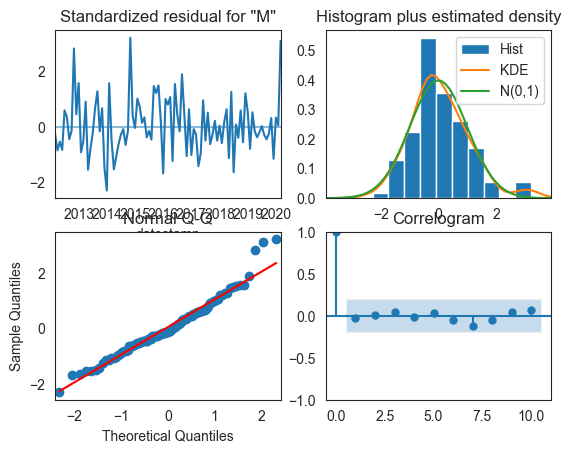

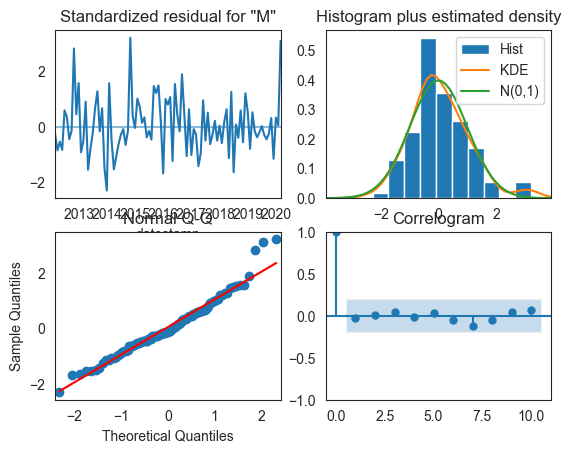

In [35]:
print(results1.summary())
results1.plot_diagnostics() 

                                     SARIMAX Results                                      
Dep. Variable:                                Men   No. Observations:                  110
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 -11.918
Date:                            Fri, 19 Apr 2024   AIC                             33.837
Time:                                    00:52:01   BIC                             46.710
Sample:                                02-28-2011   HQIC                            39.042
                                     - 03-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3608      1.071     -1.271      0.204      -3.460       0.738
ma.L2          0.3648      0.359   

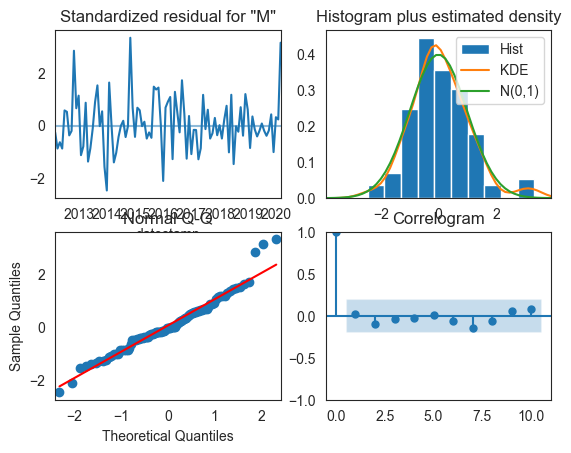

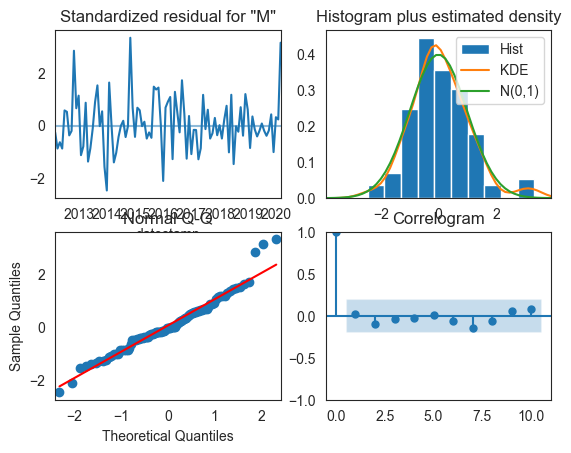

In [36]:
print(results2.summary())
results2.plot_diagnostics()

Based on the diagnostic results:

Both models have very close AIC and BIC values, indicating similar goodness of fit.
The Ljung-Box test (probQ statistic) for autocorrelation at lag 1 is low for both models, suggesting that the residuals are not exhibiting significant autocorrelation.
The Jarque-Bera test for normality of residuals is significant (p-value < 0.05) for both models, indicating that the residuals might not be normally distributed.
The Heteroskedasticity test (probH) is close to 1 for both models, indicating that the residuals might not exhibit heteroskedasticity.
Considering the similarity in AIC, BIC, and diagnostic results, it's challenging to decisively conclude which model is better based solely on these metrics. However, the slight advantage in AIC and BIC of the SARIMAX(1, 1, 2)x(0, 1, 2, 12) model suggests it may be slightly better in terms of parsimony, penalizing for the number of parameters.

In [63]:
# Make in-sample prediction
forecast_in = results1.get_prediction(start=-25)

# forecast mean 
mean_forecast_in = forecast_in.predicted_mean 

# Get confidence intervals of forecasts 
confidence_intervals_in = forecast_in.conf_int() 



# Forecast forward
forecast_forward = results1.get_forecast(steps=25)  # Change steps as needed for your forecasting horizon

# Get forecasted mean and confidence intervals
mean_forecast_forward = forecast_forward.predicted_mean 
confidence_intervals_forward = forecast_forward.conf_int()

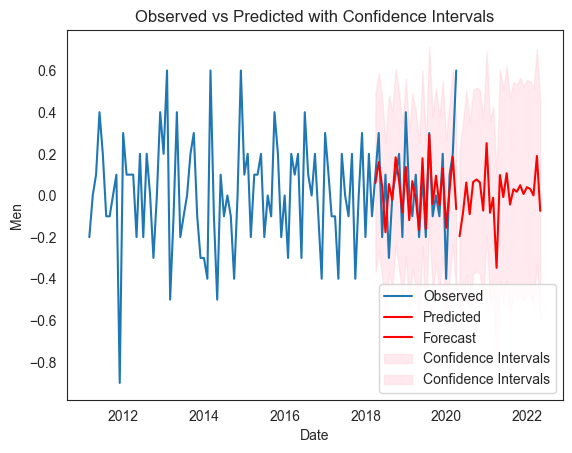

In [53]:
# Plot observed values
plt.plot(df_men1.index, df_men1, label='Observed')

# Plot predicted inside values
plt.plot(mean_forecast_in.index, mean_forecast_in, color='red', label='Predicted')

# Plot forecasted forward values
plt.plot(mean_forecast_forward.index, mean_forecast_forward, color='red', label='Forecast')

# Plot confidence intervals
plt.fill_between(mean_forecast_in.index, 
                 confidence_intervals_in.iloc[:, 0], 
                 confidence_intervals_in.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

# Plot confidence intervals
plt.fill_between(mean_forecast_forward.index, 
                 confidence_intervals_forward.iloc[:, 0], 
                 confidence_intervals_forward.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Men')
plt.title('Observed vs Predicted with Confidence Intervals')
plt.legend()

# Show plot
plt.show()

In [ ]:
To plot the forecasted values and their confidence intervals on the original data, I reverse the transformations before plotting.

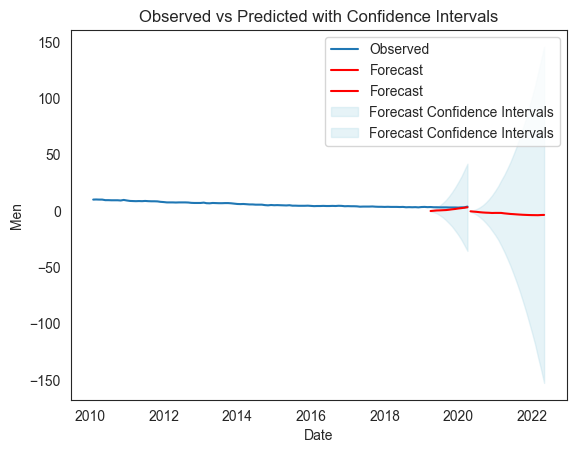

In [68]:
# Reverse the stationarization process to obtain predictions on the original data
# Cumulatively sum twice with a lag of 12 periods each
forecast_mean_original = mean_forecast_forward.cumsum().cumsum()
forecast_conf_int_original = confidence_intervals_forward.cumsum().cumsum()

forecast_mean_original_in = mean_forecast_in.cumsum().cumsum().shift(12)
forecast_conf_int_original_in = confidence_intervals_in.cumsum().cumsum().shift(12)

# Plot observed values
plt.plot(monthly_data.index, monthly_data['Men'], label='Observed')


# Plot forecasted forward values
plt.plot(forecast_mean_original.index, forecast_mean_original, color='red', label='Forecast')

# Plot forecasted internal values
plt.plot(forecast_mean_original_in.index, forecast_mean_original_in, color='red', label='Forecast')

# Plot confidence intervals for forecasted values
plt.fill_between(forecast_mean_original.index, 
                 forecast_conf_int_original.iloc[:, 0], 
                 forecast_conf_int_original.iloc[:, 1], color='lightblue', alpha=0.3, label='Forecast Confidence Intervals')

# Plot confidence intervals for forecasted values
plt.fill_between(forecast_mean_original_in.index, 
                 forecast_conf_int_original_in.iloc[:, 0], 
                 forecast_conf_int_original_in.iloc[:, 1], color='lightblue', alpha=0.3, label='Forecast Confidence Intervals')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Men')
plt.title('Observed vs Predicted with Confidence Intervals')
plt.legend()

# Show plot
plt.show()

In [84]:
# Get the forecasted mean value for April 2021
predicted_value_april_2021 = forecast_forward.predicted_mean.loc['2021-04']

# Print the predicted value
print("Predicted unemployment rate of men in April 2021:", predicted_value_april_2021)

Predicted unemployment rate of men in April 2021: 2021-04-30    0.097966
Freq: ME, Name: predicted_mean, dtype: float64


# Conclusion:

Overall, this data analysis provides valuable insights into the complex dynamics of unemployment rates in the United States. The analysis sheds light on the disparities and trends across different demographic groups by examining unemployment rates based on education level, race, and gender from 2010 to 2020.

1. The findings highlight the critical role of education in shaping employment outcomes. Individuals with higher educational qualifications, such as professional or associate degrees, tend to experience lower unemployment rates and fluctuations compared to those with lower levels of education. This underscores the importance of investing in education and skill development to enhance workforce participation and economic resilience.

2. Significant disparities exist in unemployment rates among different racial groups. Black and Hispanic populations consistently face higher unemployment rates compared to White and Asian populations. Addressing these disparities requires targeted interventions aimed at addressing systemic barriers and promoting equal access to economic opportunities for all racial groups.

3. Although women generally have slightly lower unemployment rates than men, there are nuanced differences in employment trends between the genders. Understanding these gender-specific patterns is crucial for designing policies and initiatives that address the unique challenges faced by men and women in the labor market.

4. The presence of seasonal patterns in unemployment rates highlights the influence of temporal factors on employment trends. These patterns vary among different demographic groups, indicating the need for tailored approaches to address seasonal fluctuations in unemployment and support vulnerable populations during periods of economic uncertainty.

5. The unemployment rate for men is expected to decrease further.

In conclusion, this analysis underscores the importance of adopting a holistic and intersectional approach to addressing unemployment disparities. By leveraging these insights, policymakers, economists, and stakeholders can develop evidence-based strategies to promote inclusive economic growth, reduce inequality, and create a more resilient labor market that benefits all segments of society.

Thank you for the attention. 

![Thank you on paper](Thank%20you%20on%20paper.jpg)
